<a href="https://colab.research.google.com/github/spour/DeepExplain/blob/master/CNN_pogress_binary_shap_290821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install simdna
# !pip install -U tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 462 kB 64.7 MB/s 
     |████████████████████████████████| 4.0 MB 27.0 MB/s 
     |████████████████████████████████| 1.2 MB 40.9 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [1]:
# !pip install git+https://github.com/kundajelab/simdna.git
!pip install git+https://github.com/kundajelab/dragonn.git --no-deps

  Cloning https://github.com/kundajelab/dragonn.git to /tmp/pip-req-build-e9rvfrns
  Running command git clone -q https://github.com/kundajelab/dragonn.git /tmp/pip-req-build-e9rvfrns
  Created wheel for dragonn: filename=dragonn-0.4.1-py3-none-any.whl size=38788 sha256=6e63ecdcd3d50475fe53ed10ee09800c933910d03db51946d74be5b63d5f2bcf
  Stored in directory: /tmp/pip-ephem-wheel-cache-3mpsimkd/wheels/0a/6d/6a/3e79165d27d54a2e2c07066d95dfe9020e9e3760f56ead4633
Successfully built dragonn


In [4]:
# !pip install numpy -U

     |████████████████████████████████| 15.7 MB 190 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.0
    Uninstalling numpy-1.16.0:
      Successfully uninstalled numpy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires gast==0.4.0, but you have gast 0.3.3 which is incompatible.
tensorflow 2.5.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, but you have tensorflow-estimator 2.3.0 which is incompatible.
tensorflow-gpu 2.3.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.2 which is incompatible.
dragonn 0.4.1 requires numpy==1.16, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.

In [1]:
# !pip install simdna==0.4.2 --no-deps
# !pip install simdna-dragonn==0.1 --no-deps
!pip install dragonn --no-deps
!pip install numpy keras tensorflow-gpu deeplift shapely matplotlib plotnine scikit-learn pydot_ng h5py seqdataloader simdna_dragonn abstention

     |████████████████████████████████| 458.3 MB 10 kB/s 
     |████████████████████████████████| 107 kB 52.2 MB/s 
     |████████████████████████████████| 648 kB 52.0 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 233 kB 44.2 MB/s 
     |████████████████████████████████| 12.5 MB 132 kB/s 
     |████████████████████████████████| 16.2 MB 104 kB/s 
     |████████████████████████████████| 9.9 MB 30.0 MB/s 
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
     |████████████████████████████████| 10.3 MB 146 kB/s 
     |████████████████████████████████| 41 kB 88 kB/s 
  Created wheel for deeplift: filename=deeplift-0.6.13.0-py3-none-any.whl size=36449 sha256=6287bc3485f1dc5b07bce737bc67b1628b88ba03dfeeb4d2a48d2b2c16123eaa
  Stored in directory: /root/.cache/pip/wheels/5f/0f/15/3cb70dbd2147a5c948da210c6a283d87ea19c8e8ecb941b21e
  Created wheel for deeptoolsintervals: filenam

In [1]:
# from dragonn import simulations

from dragonn.simulations import * 
print_available_simulations()

simulate_differential_accessibility
simulate_heterodimer_grammar
simulate_motif_counting
simulate_motif_density_localization
simulate_multi_motif_embedding
simulate_single_motif_detection


In [2]:
data = simulations.simulate_multi_motif_embedding(
    motif_names = ["SIX5_known1", "CTCF_known1", "ZNF143_known2"],
    seq_length = 500,
    min_num_motifs = 1,
    max_num_motifs=3,
    num_seqs = 5000, 
    GC_fraction=0.4
)
sequences = data[0]
labels = data[1]

In [3]:
import numpy as np

#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels)
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
onehot_data = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])

In [16]:
print(labels.shape)
onehot_data.shape

(5000, 3)


(5000, 500, 4)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Activation, Flatten, Dense, Dropout
import tensorflow.keras as keras
tf.compat.v1.disable_eager_execution()
one_filter_keras_model=Sequential() 
conv_layer = Conv1D(filters=50,kernel_size=(10),padding="same",input_shape=onehot_data.shape[1::])
one_filter_keras_model.add(conv_layer)
# one_filter_keras_model.add(BatchNormalization(axis=-1))
one_filter_keras_model.add(Activation('relu'))
one_filter_keras_model.add(Conv1D(filters=50,kernel_size=(10),padding="same"))
# one_filter_keras_model.add(Activation('relu'))
one_filter_keras_model.add(MaxPooling1D(pool_size=(35)))
one_filter_keras_model.add(Flatten())
one_filter_keras_model.add(Dense(3)) #there are three classes therefore 3 possibilities
one_filter_keras_model.add(Activation("relu"))
one_filter_keras_model.add(Dropout(0.25))
one_filter_keras_model.add(Activation("sigmoid"))

In [47]:
from tensorflow.keras.metrics import CategoricalAccuracy, AUC
one_filter_keras_model.compile(optimizer='adam',
                               loss='categorical_crossentropy',
                               metrics=[CategoricalAccuracy(), 
                                        AUC(curve='ROC'),
                                        AUC(curve='PR')])
from tensorflow.keras.callbacks import EarlyStopping, History
history_one_filter=one_filter_keras_model.fit(x=onehot_data,
                                  y=labels,
                                  batch_size=128,
                                  validation_split=0.2,  # use 20% of the data as the validation set
                                  callbacks=[EarlyStopping(patience=3),   # If val_loss doesn't decrease after 3 epochs, stop training
                                  History()], 
                                  verbose=1,  # On every optimization step, we use 512 examples from the training data
                                  epochs=100
                                  )

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 14s 3ms/sample - loss: 2.6025 - categorical_accuracy: 0.6687 - auc_16: 0.5012 - auc_17: 0.6701 - val_loss: 2.3906 - val_categorical_accuracy: 0.6870 - val_auc_16: 0.5122 - val_auc_17: 0.6804
Epoch 2/100
4000/4000 [==============================] - 13s 3ms/sample - loss: 10.9461 - categorical_accuracy: 0.5092 - auc_16: 0.4999 - auc_17: 0.6697 - val_loss: 28.2290 - val_categorical_accuracy: 0.6870 - val_auc_16: 0.5038 - val_auc_17: 0.6740
Epoch 3/100
4000/4000 [==============================] - 13s 3ms/sample - loss: 231.2637 - categorical_accuracy: 0.5822 - auc_16: 0.4982 - auc_17: 0.6678 - val_loss: 350.0092 - val_categorical_accuracy: 0.6870 - val_auc_16: 0.5038 - val_auc_17: 0.6740
Epoch 4/100
4000/4000 [==============================] - 13s 3ms/sample - loss: 1251.3958 - categorical_accuracy: 0.5835 - auc_16: 0.5032 - auc_17: 0.6709 - val_loss: 1251.7979 - val_categorical_accurac

In [20]:
!pip install shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491653 sha256=11405059b51e6f0390702d949e1887df7d3a7faf9d88f7d496fbb4cc21bede53
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [31]:
labels[[0,1,2 ]]

array([[False,  True,  True],
       [False, False,  True],
       [ True,  True,  True]])

In [33]:
#shuffled background
from collections import defaultdict
from random import shuffle


# compile the dinucleotide edges
def prepare_edges(s):
    edges = defaultdict(list)
    for i in range(len(s) - 1):
        edges[tuple(s[i])].append(s[i + 1])
    return edges


def shuffle_edges(edges):
    # for each character, remove the last edge, shuffle, add edge back
    for char in edges:
        last_edge = edges[char][-1]
        edges[char] = edges[char][:-1]
        the_list = edges[char]
        shuffle(the_list)
        edges[char].append(last_edge)
    return edges


def traverse_edges(s, edges):
    generated = [s[0]]
    edges_queue_pointers = defaultdict(lambda: 0)
    for i in range(len(s) - 1):
        last_char = generated[-1]
        generated.append(edges[tuple(last_char)][edges_queue_pointers[tuple(last_char)]])
        edges_queue_pointers[tuple(last_char)] += 1
    if isinstance(generated[0], str):
        return "".join(generated)
    else:
        import numpy as np
        return np.asarray(generated)


def dinuc_shuffle(s):
    if isinstance(s, str):
        s = s.upper()
    return traverse_edges(s, shuffle_edges(prepare_edges(s)))


def onehot_dinuc_shuffle(s):
    s = np.squeeze(s)
    argmax_vals = "".join([str(x) for x in np.argmax(s, axis=-1)])
    shuffled_argmax_vals = [int(x) for x in traverse_edges(argmax_vals,
                            shuffle_edges(prepare_edges(argmax_vals)))]
    to_return = np.zeros_like(s)
    to_return[list(range(len(s))), shuffled_argmax_vals] = 1
    return to_return

shuffle_several_times = lambda s: np.array([onehot_dinuc_shuffle(s) for i in range(10)])

In [217]:
shuffle_n_times = lambda s,n: np.array([onehot_dinuc_shuffle(s) for i in range(n)])
r=[shuffle_n_times(s, 1) for s in onehot_data]

In [222]:
r = np.concatenate(r, axis =0)

In [37]:
#other model
! [[ ! -f keras2_conv1d_record_5_model_PQzyq_modelJson.json ]] && wget https://raw.githubusercontent.com/AvantiShri/model_storage/b6e1d69/deeplift/genomics/keras2_conv1d_record_5_model_PQzyq_modelJson.json
! [[ ! -f keras2_conv1d_record_5_model_PQzyq_modelWeights.h5 ]] && wget https://raw.githubusercontent.com/AvantiShri/model_storage/b6e1d69/deeplift/genomics/keras2_conv1d_record_5_model_PQzyq_modelWeights.h5

from tensorflow.keras.models import model_from_json
keras_model_weights = "keras2_conv1d_record_5_model_PQzyq_modelWeights.h5"
keras_model_json = "keras2_conv1d_record_5_model_PQzyq_modelJson.json"

keras_model = model_from_json(open(keras_model_json).read())
keras_model.load_weights(keras_model_weights)

In [240]:
labels = labels.astype(int)
# labels_wdinuc = np.concatenate((labels.any(axis=1),r ))
print(labels)
labelsbin = labels[:,0]
labels.any(axis=1)
# len(np.where(labels.any(axis=1)==False))
labelsbin

#true
trues =labels.any(axis=1).astype(int)
#false
falses = np.full((r.shape[0]), 0)
# both
both = np.concatenate((trues, falses))
both.shape

#both seq
both_seq = np.concatenate((np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences]), r))
# both_seq = np.concatenate(one_hot_encode(sequences),r)



[[0 1 1]
 [0 0 1]
 [1 1 1]
 ...
 [0 1 0]
 [0 1 1]
 [1 1 1]]


In [244]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Activation, Flatten, Dense, Dropout
import tensorflow.keras as keras
tf.compat.v1.disable_eager_execution()

model1 = Sequential()
model1.add(Conv1D(filters=300, kernel_size=(19), padding='same', input_shape=onehot_data.shape[1::]))
# model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
model1.add(Conv1D(filters=300, kernel_size=(19), padding='same'))
model1.add(Flatten())
model1.add(Dense(1)) #there are three classes therefore 3 possibilities
model1.add(Activation("sigmoid"))


one_filter_keras_model=Sequential() 
conv_layer = Conv1D(filters=50,kernel_size=(15),padding="same",input_shape=onehot_data.shape[1::])
one_filter_keras_model.add(conv_layer)
# one_filter_keras_model.add(BatchNormalization()) #this is the thing that leads to the weird dimension error
one_filter_keras_model.add(Activation('relu'))
one_filter_keras_model.add(Conv1D(filters=5,kernel_size=(10),padding="same"))
# one_filter_keras_model.add(Activation('relu'))
one_filter_keras_model.add(MaxPooling1D(pool_size=(35)))
one_filter_keras_model.add(Flatten())
one_filter_keras_model.add(Dense(1)) #there are three classes therefore 3 possibilities
one_filter_keras_model.add(Activation("relu"))
one_filter_keras_model.add(Dropout(0.25))
one_filter_keras_model.add(Activation("sigmoid"))

model1.compile(optimizer='adam',
                               loss='binary_crossentropy',
                               metrics=[tensorflow.keras.metrics.BinaryCrossentropy(),
                                        tensorflow.keras.metrics.AUC(curve='ROC'),
                                        tensorflow.keras.metrics.AUC(curve='PR')])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onehot_data, labelsbin, test_size=0.33, random_state=42)

history_one_filter=model1.fit(x=X_train,
                                  y=y_train,
                                  batch_size=16,
                                  epochs=100,
                                  callbacks=[EarlyStopping(patience=3, monitor='val_loss'),   # If val_loss doesn't decrease after 3 epochs, stop training
                                  History()],
                                  verbose=1, 
                                  validation_split = 0.1)


# one_filter_keras_model=Sequential() 
# conv_layer = Conv1D(filters=50,kernel_size=(10),padding="same",input_shape=onehot_data.shape[1::])
# one_filter_keras_model.add(conv_layer)
# # one_filter_keras_model.add(BatchNormalization(axis=-1))
# one_filter_keras_model.add(Activation('relu'))
# one_filter_keras_model.add(Conv1D(filters=50,kernel_size=(10),padding="same"))
# # one_filter_keras_model.add(Activation('relu'))
# one_filter_keras_model.add(MaxPooling1D(pool_size=(35)))
# one_filter_keras_model.add(Flatten())
# one_filter_keras_model.add(Dense(3)) #there are three classes therefore 3 possibilities
# one_filter_keras_model.add(Activation("relu"))
# one_filter_keras_model.add(Dropout(0.25))
# one_filter_keras_model.add(Activation("sigmoid"))

Train on 3015 samples, validate on 335 samples
Epoch 1/100
3015/3015 [==============================] - 141s 47ms/sample - loss: 0.7073 - binary_crossentropy: 0.7073 - auc_78: 0.5045 - auc_79: 0.6770 - val_loss: 0.6531 - val_binary_crossentropy: 0.6531 - val_auc_78: 0.4940 - val_auc_79: 0.6299
Epoch 2/100
3015/3015 [==============================] - 138s 46ms/sample - loss: 0.6331 - binary_crossentropy: 0.6331 - auc_78: 0.5132 - auc_79: 0.6812 - val_loss: 0.6558 - val_binary_crossentropy: 0.6558 - val_auc_78: 0.5287 - val_auc_79: 0.6694
Epoch 3/100
3015/3015 [==============================] - 138s 46ms/sample - loss: 0.6301 - binary_crossentropy: 0.6301 - auc_78: 0.5478 - auc_79: 0.7048 - val_loss: 0.6586 - val_binary_crossentropy: 0.6586 - val_auc_78: 0.5485 - val_auc_79: 0.6691
Epoch 4/100
3015/3015 [==============================] - 138s 46ms/sample - loss: 0.6164 - binary_crossentropy: 0.6164 - auc_78: 0.6112 - auc_79: 0.7393 - val_loss: 0.6618 - val_binary_crossentropy: 0.6618 - v

In [245]:
model1.evaluate(X_test, y_test, verbose=3)

[0.6702199432344148, 0.6702199, 0.47680572, 0.66406614]

In [95]:
model1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 500, 300)          23100     
_________________________________________________________________
batch_normalization_13 (Batc (None, 500, 300)          1200      
_________________________________________________________________
activation_78 (Activation)   (None, 500, 300)          0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 167, 300)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 50100)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 150303    
_________________________________________________________________
activation_79 (Activation)   (None, 3)               

(3, 500, 4)
3


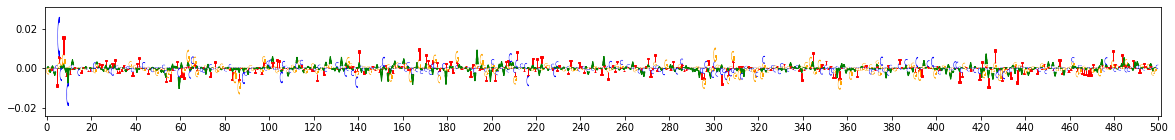

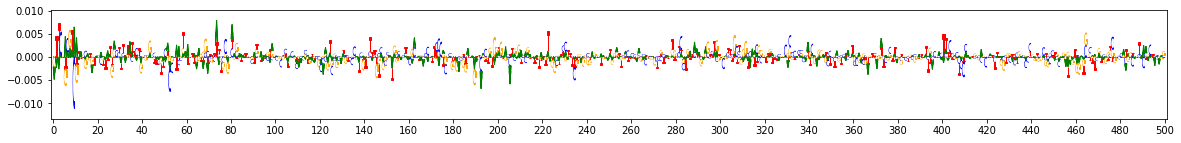

In [ ]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

seqs_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[0,1,2]]
bg_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[1,3,5]]

# e = shap.DeepExplainer((model1.input, model1.output[:,0]), bg_to_explain)
e = shap.DeepExplainer(model1, bg_to_explain)
print(seqs_to_explain.shape)
shap_values = e.shap_values(seqs_to_explain, check_additivity=False)

print(len(shap_values[0]))
shap_values[0][1].shape
# dinuc_shuff_explanations = np.sum(shap_values,axis=-1)[:,:,None]*seqs_to_explain

for dinuc_shuff_explanation in shap_values[0]:
    viz_sequence.plot_weights(dinuc_shuff_explanation, subticks_frequency=20)

(3, 500, 4)
3


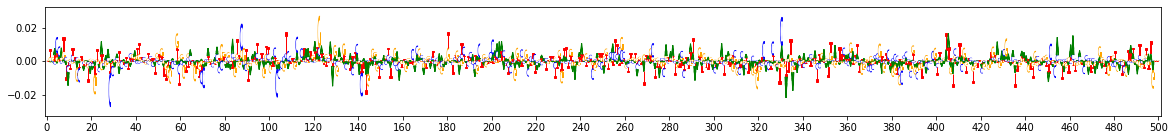

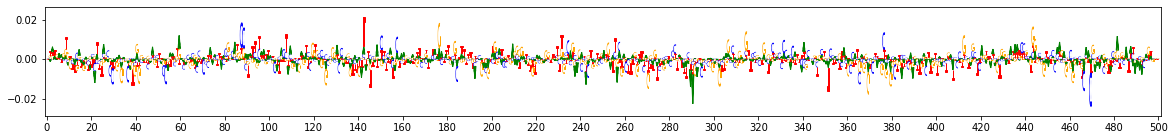

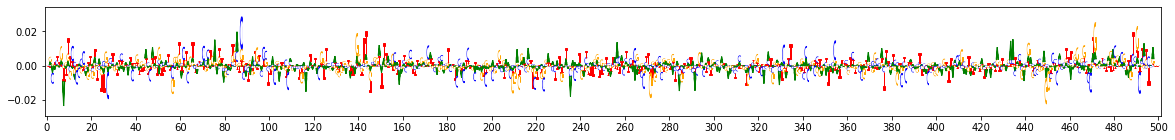

In [150]:
#with shuffling
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

seqs_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[0,1,2]]
bg_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[1,3,5]]

# e = shap.DeepExplainer((model1.input, model1.output[:,0]), bg_to_explain)
e = shap.DeepExplainer(model1, shuffle_several_times)
print(seqs_to_explain.shape)
shap_values = e.shap_values(seqs_to_explain, check_additivity=False)

print(len(shap_values[0]))
shap_values[0][1].shape
# dinuc_shuff_explanations = np.sum(shap_values,axis=-1)[:,:,None]*seqs_to_explain

for dinuc_shuff_explanation in shap_values[0]:
    viz_sequence.plot_weights(dinuc_shuff_explanation, subticks_frequency=20)

In [76]:
# !pip install deeplift
# !pip install shap

from deeplift.visualization import viz_sequence
import shap
# import shap.explainers.deep.deep_tf
# reload(shap.explainers.deep.deep_tf)
# reload(shap.explainers.deep)
# reload(shap.explainers)
# reload(shap)
import numpy as np
np.random.seed(1)
import random

# seqs_to_explain = onehot_data[[0,3,9]] #these three are positive for task 0
# dinuc_shuff_explainer = shap.DeepExplainer(one_filter_keras_model, seqs_to_explain)
# raw_shap_explanations = dinuc_shuff_explainer.shap_values(seqs_to_explain)

seqs_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[0,1,2]]
bg_to_explain = np.array([one_hot_encode_along_channel_axis(seq) for seq in sequences])[[4,3,5]]
dinuc_shuff_explainer = shap.DeepExplainer((model1.input, model1.output[:,0]), shuffle_several_times)
raw_shap_explanations = dinuc_shuff_explainer.shap_values(seqs_to_explain, check_additivity=False)
#project the importance at each position onto the base that's actually present


# for dinuc_shuff_explanation in dinuc_shuff_explanations:
#     viz_sequence.plot_weights(dinuc_shuff_explanation, subticks_frequency=20)
# dinuc_shuff_explanations = np.sum(raw_shap_explanations,axis=-1)[:,:,None]*seqs_to_explain
# for dinuc_shuff_explanation in dinuc_shuff_explanations:
#     viz_sequence.plot_weights(dinuc_shuff_explanation, subticks_frequency=20)

deepexplain


In [151]:
#@title deepexplain refactor
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import numpy as np
from skimage.util import view_as_windows
import warnings, logging
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.ops import nn_grad, math_grad
from collections import OrderedDict
import numpy as np
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Some of the following functions for batch processing have been borrowed and adapter from Keras
# https://github.com/keras-team/keras/blob/master/keras/utils/generic_utils.py
# https://github.com/keras-team/keras/blob/master/keras/engine/training_utils.py


def make_batches(size, batch_size):
    """Returns a list of batch indices (tuples of indices).
    # Arguments
        size: Integer, total size of the data to slice into batches.
        batch_size: Integer, batch size.
    # Returns
        A list of tuples of array indices.
    """
    num_batches = (size + batch_size - 1) // batch_size  # round up
    return [(i * batch_size, min(size, (i + 1) * batch_size))
            for i in range(num_batches)]


def to_list(x, allow_tuple=False):
    """Normalizes a list/tensor into a list.
    If a tensor is passed, we return
    a list of size 1 containing the tensor.
    # Arguments
        x: target object to be normalized.
        allow_tuple: If False and x is a tuple,
            it will be converted into a list
            with a single element (the tuple).
            Else converts the tuple to a list.
    # Returns
        A list.
    """
    if isinstance(x, list):
        return x
    if allow_tuple and isinstance(x, tuple):
        return list(x)
    return [x]


def unpack_singleton(x):
    """Gets the equivalent np-array if the iterable has only one value.
    Otherwise return the iterable.
    # Argument
        x: A list or tuple.
    # Returns
        The same iterable or the iterable converted to a np-array.
    """
    if len(x) == 1:
        return np.array(x)
    return x


def slice_arrays(arrays, start=None, stop=None):
    """Slices an array or list of arrays.
    """
    if arrays is None:
        return [None]
    elif isinstance(arrays, list):
        return [None if x is None else x[start:stop] for x in arrays]
    else:
        return arrays[start:stop]


def placeholder_from_data(numpy_array):
    if numpy_array is None:
        return None
    return tf.compat.v1.placeholder('float', [None,] + list(numpy_array.shape[1:]))

SUPPORTED_ACTIVATIONS = [
    'Relu', 'Elu', 'Sigmoid', 'Tanh', 'Softplus'
]

UNSUPPORTED_ACTIVATIONS = [
    'CRelu', 'Relu6', 'Softsign'
]

_ENABLED_METHOD_CLASS = None
_GRAD_OVERRIDE_CHECKFLAG = 0


# -----------------------------------------------------------------------------
# UTILITY FUNCTIONS
# -----------------------------------------------------------------------------


def activation(type):
    """
    Returns Tensorflow's activation op, given its type
    :param type: string
    :return: op
    """
    if type not in SUPPORTED_ACTIVATIONS:
        warnings.warn('Activation function (%s) not supported' % type)
    f = getattr(tf.nn, type.lower())
    return f


def original_grad(op, grad):
    """
    Return original Tensorflow gradient for an op
    :param op: op
    :param grad: Tensor
    :return: Tensor
    """
    if op.type not in SUPPORTED_ACTIVATIONS:
        warnings.warn('Activation function (%s) not supported' % op.type)
    opname = '_%sGrad' % op.type
    if hasattr(nn_grad, opname):
        f = getattr(nn_grad, opname)
    else:
        f = getattr(math_grad, opname)
    return f(op, grad)


# -----------------------------------------------------------------------------
# ATTRIBUTION METHODS BASE CLASSES
# -----------------------------------------------------------------------------


class AttributionMethod(object):
    """
    Attribution method base class
    """
    def __init__(self, T, X, session, keras_learning_phase=None):
        self.T = T  # target Tensor
        self.X = X  # input Tensor
        self.Y_shape = [None,] + T.get_shape().as_list()[1:]
        # Most often T contains multiple output units. In this case, it is often necessary to select
        # a single unit to compute contributions for. This can be achieved passing 'ys' as weight for the output Tensor.
        self.Y = tf.compat.v1.placeholder(tf.float32, self.Y_shape)
        # placeholder_from_data(ys) if ys is not None else 1.0  # Tensor that represents weights for T
        self.T = self.T * self.Y
        self.symbolic_attribution = None
        self.session = session
        self.keras_learning_phase = keras_learning_phase
        self.has_multiple_inputs = type(self.X) is list or type(self.X) is tuple
        logging.info('Model with multiple inputs: %s' % self.has_multiple_inputs)

        # Set baseline
        # TODO: now this sets a baseline also for those methods that does not require it
        self._set_check_baseline()

        # References
        self._init_references()

        # Create symbolic explanation once during construction (affects only gradient-based methods)
        self.explain_symbolic()

    def explain_symbolic(self):
        return None

    def run(self, xs, ys=None, batch_size=None):
        pass

    def _init_references(self):
        pass

    def _check_input_compatibility(self, xs, ys=None, batch_size=None):
        if ys is not None:
            if not self.has_multiple_inputs and len(xs) != len(ys):
                raise RuntimeError('When provided, ys must have the same batch size as xs (xs has batch size {} and ys {})'.format(len(xs), len(ys)))
            elif self.has_multiple_inputs and np.all([len(i) != len(ys) for i in xs]):
                raise RuntimeError('When provided, ys must have the same batch size as all elements of xs')
        if batch_size is not None and batch_size > 0:
            if self.T.shape[0].value is not None and self.T.shape[0].value is not batch_size:
                raise RuntimeError('When using batch evaluation, the first dimension of the target tensor '
                                   'must be compatible with the batch size. Found %s instead' % self.T.shape[0].value)
            if isinstance(self.X, list):
                for x in self.X:
                    if x.shape[0].value is not None and x.shape[0].value is not batch_size:
                        raise RuntimeError('When using batch evaluation, the first dimension of the input tensor '
                                           'must be compatible with the batch size. Found %s instead' % x.shape[
                                               0].value)
            else:
                if self.X.shape[0].value is not None and self.X.shape[0].value is not batch_size:
                    raise RuntimeError('When using batch evaluation, the first dimension of the input tensor '
                                       'must be compatible with the batch size. Found %s instead' % self.X.shape[0].value)

    def _session_run_batch(self, T, xs, ys=None):
        feed_dict = {}
        if self.has_multiple_inputs:
            for k, v in zip(self.X, xs):
                feed_dict[k] = v
        else:
            feed_dict[self.X] = xs

        # If ys is not passed, produce a vector of ones that will be broadcasted to all batch samples
        feed_dict[self.Y] = ys if ys is not None else np.ones([1,] + self.Y_shape[1:])

        if self.keras_learning_phase is not None:
            feed_dict[self.keras_learning_phase] = 0
        return self.session.run(T, feed_dict)

    def _session_run(self, T, xs, ys=None, batch_size=None):
        num_samples = len(xs)
        if self.has_multiple_inputs is True:
            num_samples = len(xs[0])
            if len(xs) != len(self.X):
                raise RuntimeError('List of input tensors and input data have different lengths (%s and %s)'
                                   % (str(len(xs)), str(len(self.X))))
            if batch_size is not None:
                for xi in xs:
                    if len(xi) != num_samples:
                        raise RuntimeError('Evaluation in batches requires all inputs to have '
                                           'the same number of samples')

        if batch_size is None or batch_size <= 0 or num_samples <= batch_size:
            return self._session_run_batch(T, xs, ys)
        else:
            outs = []
            batches = make_batches(num_samples, batch_size)
            for batch_index, (batch_start, batch_end) in enumerate(batches):
                # Get a batch from data
                xs_batch = slice_arrays(xs, batch_start, batch_end)
                # If the target tensor has one entry for each sample, we need to batch it as well
                ys_batch = None
                if ys is not None:
                    ys_batch = slice_arrays(ys, batch_start, batch_end)
                batch_outs = self._session_run_batch(T, xs_batch, ys_batch)
                batch_outs = to_list(batch_outs)
                if batch_index == 0:
                    # Pre-allocate the results arrays.
                    for batch_out in batch_outs:
                        shape = (num_samples,) + batch_out.shape[1:]
                        outs.append(np.zeros(shape, dtype=batch_out.dtype))
                for i, batch_out in enumerate(batch_outs):
                    outs[i][batch_start:batch_end] = batch_out
            return unpack_singleton(outs)

    def _set_check_baseline(self):
        # Do nothing for those methods that have no baseline required
        if not hasattr(self, "baseline"):
            return

        if self.baseline is None:
            if self.has_multiple_inputs:
                self.baseline = [np.zeros([1,] + xi.get_shape().as_list()[1:]) for xi in self.X]
            else:
                self.baseline = np.zeros([1,] + self.X.get_shape().as_list()[1:])

        else:
            if self.has_multiple_inputs:
                for i, xi in enumerate(self.X):
                    if list(self.baseline[i].shape) == xi.get_shape().as_list()[1:]:
                        self.baseline[i] = np.expand_dims(self.baseline[i], 0)
                    else:
                        raise RuntimeError('Baseline shape %s does not match expected shape %s'
                                           % (self.baseline[i].shape, self.X.get_shape().as_list()[1:]))
            else:
                if list(self.baseline.shape) == self.X.get_shape().as_list()[1:]:
                    self.baseline = np.expand_dims(self.baseline, 0)
                else:
                    raise RuntimeError('Baseline shape %s does not match expected shape %s'
                                       % (self.baseline.shape, self.X.get_shape().as_list()[1:]))


class GradientBasedMethod(AttributionMethod):
    """
    Base class for gradient-based attribution methods
    """
    def get_symbolic_attribution(self):
        return tf.gradients(self.T, self.X)

    def explain_symbolic(self):
        if self.symbolic_attribution is None:
            self.symbolic_attribution = self.get_symbolic_attribution()
        return self.symbolic_attribution

    def run(self, xs, ys=None, batch_size=None):
        self._check_input_compatibility(xs, ys, batch_size)
        results = self._session_run(self.explain_symbolic(), xs, ys, batch_size)
        return results[0] if not self.has_multiple_inputs else results

    @classmethod
    def nonlinearity_grad_override(cls, op, grad):
        return original_grad(op, grad)


class PerturbationBasedMethod(AttributionMethod):
    """
       Base class for perturbation-based attribution methods
       """
    def __init__(self, T, X, session, keras_learning_phase):
        super(PerturbationBasedMethod, self).__init__(T, X, session, keras_learning_phase)
        self.base_activation = None



# -----------------------------------------------------------------------------
# ATTRIBUTION METHODS
# -----------------------------------------------------------------------------
"""
Returns zero attributions. For testing only.
"""


class DummyZero(GradientBasedMethod):

    def get_symbolic_attribution(self,):
        return tf.gradients(self.T, self.X)

    @classmethod
    def nonlinearity_grad_override(cls, op, grad):
        input = op.inputs[0]
        return tf.zeros_like(input)

"""
Saliency maps
https://arxiv.org/abs/1312.6034
"""


class Saliency(GradientBasedMethod):

    def get_symbolic_attribution(self):
        return [tf.abs(g) for g in tf.gradients(self.T, self.X)]


"""
Gradient * Input
https://arxiv.org/pdf/1704.02685.pdf - https://arxiv.org/abs/1611.07270
"""


class GradientXInput(GradientBasedMethod):

    def get_symbolic_attribution(self):
        return [g * x for g, x in zip(
            tf.gradients(self.T, self.X),
            self.X if self.has_multiple_inputs else [self.X])]


"""
Integrated Gradients
https://arxiv.org/pdf/1703.01365.pdf
"""


class IntegratedGradients(GradientBasedMethod):

    def __init__(self, T, X, session, keras_learning_phase, steps=100, baseline=None):
        self.steps = steps
        self.baseline = baseline
        super(IntegratedGradients, self).__init__(T, X, session, keras_learning_phase)

    def run(self, xs, ys=None, batch_size=None):
        self._check_input_compatibility(xs, ys, batch_size)

        gradient = None
        for alpha in list(np.linspace(1. / self.steps, 1.0, self.steps)):
            xs_mod = [b + (x - b) * alpha for x, b in zip(xs, self.baseline)] if self.has_multiple_inputs \
                else self.baseline + (xs - self.baseline) * alpha
            _attr = self._session_run(self.explain_symbolic(), xs_mod, ys, batch_size)
            if gradient is None: gradient = _attr
            else: gradient = [g + a for g, a in zip(gradient, _attr)]

        results = [g * (x - b) / self.steps for g, x, b in zip(
            gradient,
            xs if self.has_multiple_inputs else [xs],
            self.baseline if self.has_multiple_inputs else [self.baseline])]

        return results[0] if not self.has_multiple_inputs else results


"""
Layer-wise Relevance Propagation with epsilon rule
http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0130140
"""


class EpsilonLRP(GradientBasedMethod):
    eps = None

    def __init__(self, T, X, session, keras_learning_phase, epsilon=1e-4):
        assert epsilon > 0.0, 'LRP epsilon must be greater than zero'
        global eps
        eps = epsilon
        super(EpsilonLRP, self).__init__(T, X, session, keras_learning_phase)

    def get_symbolic_attribution(self):
        return [g * x for g, x in zip(
            tf.gradients(self.T, self.X),
            self.X if self.has_multiple_inputs else [self.X])]

    @classmethod
    def nonlinearity_grad_override(cls, op, grad):
        output = op.outputs[0]
        input = op.inputs[0]
        return grad * output / (input + eps *
                                tf.where(input >= 0, tf.ones_like(input), -1 * tf.ones_like(input)))

"""
DeepLIFT
This reformulation only considers the "Rescale" rule
https://arxiv.org/abs/1704.02685
"""


class DeepLIFTRescale(GradientBasedMethod):

    _deeplift_ref = {}

    def __init__(self, T, X, session, keras_learning_phase, baseline=None):
        self.baseline = baseline
        super(DeepLIFTRescale, self).__init__(T, X, session, keras_learning_phase)

    def get_symbolic_attribution(self):
        return [g * (x - b) for g, x, b in zip(
            tf.gradients(self.T, self.X),
            self.X if self.has_multiple_inputs else [self.X],
            self.baseline if self.has_multiple_inputs else [self.baseline])]

    @classmethod
    def nonlinearity_grad_override(cls, op, grad):
        output = op.outputs[0]
        input = op.inputs[0]
        ref_input = cls._deeplift_ref[op.name]
        ref_output = activation(op.type)(ref_input)
        delta_out = output - ref_output
        delta_in = input - ref_input
        instant_grad = activation(op.type)(0.5 * (ref_input + input))
        return tf.where(tf.abs(delta_in) > 1e-5, grad * delta_out / delta_in,
                        original_grad(instant_grad.op, grad))

    def _init_references(self):
        # print ('DeepLIFT: computing references...')
        sys.stdout.flush()
        self._deeplift_ref.clear()
        ops = []
        g = tf.compat.v1.get_default_graph()
        for op in g.get_operations():
            if len(op.inputs) > 0 and not op.name.startswith('gradients'):
                if op.type in SUPPORTED_ACTIVATIONS:
                    ops.append(op)
        YR = self._session_run([o.inputs[0] for o in ops], self.baseline)
        for (r, op) in zip(YR, ops):
            self._deeplift_ref[op.name] = r
        # print('DeepLIFT: references ready')
        sys.stdout.flush()


"""
Occlusion method
Generalization of the grey-box method presented in https://arxiv.org/pdf/1311.2901.pdf
This method performs a systematic perturbation of contiguous hyperpatches in the input,
replacing each patch with a user-defined value (by default 0).

window_shape : integer or tuple of length xs_ndim
Defines the shape of the elementary n-dimensional orthotope the rolling window view.
If an integer is given, the shape will be a hypercube of sidelength given by its value.

step : integer or tuple of length xs_ndim
Indicates step size at which extraction shall be performed.
If integer is given, then the step is uniform in all dimensions.
"""


class Occlusion(PerturbationBasedMethod):

    def __init__(self, T, X, session, keras_learning_phase, window_shape=None, step=None):
        super(Occlusion, self).__init__(T, X, session, keras_learning_phase)
        if self.has_multiple_inputs:
            raise RuntimeError('Multiple inputs not yet supported for perturbation methods')

        input_shape = X[0].get_shape().as_list()
        if window_shape is not None:
            assert len(window_shape) == len(input_shape), \
                'window_shape must have length of input (%d)' % len(input_shape)
            self.window_shape = tuple(window_shape)
        else:
            self.window_shape = (1,) * len(input_shape)

        if step is not None:
            assert isinstance(step, int) or len(step) == len(input_shape), \
                'step must be integer or tuple with the length of input (%d)' % len(input_shape)
            self.step = step
        else:
            self.step = 1
        self.replace_value = 0.0
        logging.info('Input shape: %s; window_shape %s; step %s' % (input_shape, self.window_shape, self.step))

    def run(self, xs, ys=None, batch_size=None):
        self._check_input_compatibility(xs, ys, batch_size)
        input_shape = xs.shape[1:]
        batch_size = xs.shape[0]
        total_dim = np.asscalar(np.prod(input_shape))

        # Create mask
        index_matrix = np.arange(total_dim).reshape(input_shape)
        idx_patches = view_as_windows(index_matrix, self.window_shape, self.step).reshape((-1,) + self.window_shape)
        heatmap = np.zeros_like(xs, dtype=np.float32).reshape((-1), total_dim)
        w = np.zeros_like(heatmap)

        # Compute original output
        eval0 = self._session_run(self.T, xs, ys, batch_size)

        # Start perturbation loop
        for i, p in enumerate(idx_patches):
            mask = np.ones(input_shape).flatten()
            mask[p.flatten()] = self.replace_value
            masked_xs = mask.reshape((1,) + input_shape) * xs
            delta = eval0 - self._session_run(self.T, masked_xs, ys, batch_size)
            delta_aggregated = np.sum(delta.reshape((batch_size, -1)), -1, keepdims=True)
            heatmap[:, p.flatten()] += delta_aggregated
            w[:, p.flatten()] += p.size

        attribution = np.reshape(heatmap / w, xs.shape)
        if np.isnan(attribution).any():
            warnings.warn('Attributions generated by Occlusion method contain nans, '
                          'probably because window_shape and step do not allow to cover the all input.')
        return attribution


"""
Shapley Value sampling
Computes approximate Shapley Values using "Polynomial calculation of the Shapley value based on sampling",
Castro et al, 2009 (https://www.sciencedirect.com/science/article/pii/S0305054808000804)

samples : integer (default 5)
Defined the number of samples for each input feature. 
Notice that evaluating a model samples * n_input_feature times might take a while.

sampling_dims : list of dimension indexes to run sampling on (feature dimensions).
By default, all dimensions except the batch dimension will be sampled.
For example, with a 4-D tensor that contains color images, single color channels are sampled.
To sample pixels, instead, use sampling_dims=[1,2]
"""


class ShapleySampling(PerturbationBasedMethod):

    def __init__(self, T, X, session, keras_learning_phase, samples=5, sampling_dims=None):
        super(ShapleySampling, self).__init__(T, X, session, keras_learning_phase)
        if self.has_multiple_inputs:
            raise RuntimeError('Multiple inputs not yet supported for perturbation methods')
        dims = len(X.shape)
        if sampling_dims is not None:
            if not 0 < len(sampling_dims) <= (dims - 1):
                raise RuntimeError('sampling_dims must be a list containing 1 to %d elements' % (dims-1))
            if 0 in sampling_dims:
                raise RuntimeError('Cannot sample batch dimension: remove 0 from sampling_dims')
            if any([x < 1 or x > dims-1 for x in sampling_dims]):
                raise RuntimeError('Invalid value in sampling_dims')
        else:
            sampling_dims = list(range(1, dims))

        self.samples = samples
        self.sampling_dims = sampling_dims

    def run(self, xs, ys=None, batch_size=None):
        xs_shape = list(xs.shape)
        batch_size = xs.shape[0]
        n_features = int(np.asscalar(np.prod([xs.shape[i] for i in self.sampling_dims])))
        result = np.zeros((xs_shape[0], n_features))

        run_shape = list(xs_shape)  # a copy
        run_shape = np.delete(run_shape, self.sampling_dims).tolist()
        run_shape.insert(1, -1)

        reconstruction_shape = [xs_shape[0]]
        for j in self.sampling_dims:
            reconstruction_shape.append(xs_shape[j])

        for r in range(self.samples):
            p = np.random.permutation(n_features)
            x = xs.copy().reshape(run_shape)
            y = None
            for i in p:
                if y is None:
                    y = self._session_run(self.T, x.reshape(xs_shape), ys, batch_size)
                x[:, i] = 0
                y0 = self._session_run(self.T, x.reshape(xs_shape), ys, batch_size)
                delta = y - y0
                delta_aggregated = np.sum(delta.reshape((batch_size, -1)), -1, keepdims=False)
                result[:, i] += delta_aggregated
                y = y0

        shapley = result / self.samples
        return shapley.reshape(reconstruction_shape)


# -----------------------------------------------------------------------------
# END ATTRIBUTION METHODS
# -----------------------------------------------------------------------------


attribution_methods = OrderedDict({
    'zero': (DummyZero, 0),
    'saliency': (Saliency, 1),
    'grad*input': (GradientXInput, 2),
    'intgrad': (IntegratedGradients, 3),
    'elrp': (EpsilonLRP, 4),
    'deeplift': (DeepLIFTRescale, 5),
    'occlusion': (Occlusion, 6),
    'shapley_sampling': (ShapleySampling, 7)
})



@ops.RegisterGradient("DeepExplainGrad")
def deepexplain_grad(op, grad):
    global _ENABLED_METHOD_CLASS, _GRAD_OVERRIDE_CHECKFLAG
    _GRAD_OVERRIDE_CHECKFLAG = 1
    if _ENABLED_METHOD_CLASS is not None \
            and issubclass(_ENABLED_METHOD_CLASS, GradientBasedMethod):
        return _ENABLED_METHOD_CLASS.nonlinearity_grad_override(op, grad)
    else:
        return original_grad(op, grad)


class DeepExplain(object):

    def __init__(self, graph=None, session=tf.compat.v1.get_default_session()):
        self.method = None
        self.batch_size = None
        self.session = session
        self.graph = session.graph if graph is None else graph
        self.graph_context = self.graph.as_default()
        self.override_context = self.graph.gradient_override_map(self.get_override_map())
        self.keras_phase_placeholder = None
        self.context_on = False
        if self.session is None:
            raise RuntimeError('DeepExplain: could not retrieve a session. Use DeepExplain(session=your_session).')

    def __enter__(self):
        # Override gradient of all ops created in context
        self.graph_context.__enter__()
        self.override_context.__enter__()
        self.context_on = True
        return self

    def __exit__(self, type, value, traceback):
        self.graph_context.__exit__(type, value, traceback)
        self.override_context.__exit__(type, value, traceback)
        self.context_on = False

    def get_explainer(self, method, T, X, **kwargs):
        if not self.context_on:
            raise RuntimeError('Explain can be called only within a DeepExplain context.')
        global _ENABLED_METHOD_CLASS, _GRAD_OVERRIDE_CHECKFLAG
        self.method = method
        if self.method in attribution_methods:
            method_class, method_flag = attribution_methods[self.method]
        else:
            raise RuntimeError('Method must be in %s' % list(attribution_methods.keys()))
        if isinstance(X, list):
            for x in X:
                if 'tensor' not in str(type(x)).lower():
                    raise RuntimeError('If a list, X must contain only Tensorflow Tensor objects')
        else:
            if 'tensor' not in str(type(X)).lower():
                raise RuntimeError('X must be a Tensorflow Tensor object or a list of them')

        if 'tensor' not in str(type(T)).lower():
            raise RuntimeError('T must be a Tensorflow Tensor object')

        logging.info('DeepExplain: running "%s" explanation method (%d)' % (self.method, method_flag))
        self._check_ops()
        _GRAD_OVERRIDE_CHECKFLAG = 0

        _ENABLED_METHOD_CLASS = method_class
        method = _ENABLED_METHOD_CLASS(T, X,
                                       self.session,
                                       keras_learning_phase=self.keras_phase_placeholder,
                                       **kwargs)

        if issubclass(_ENABLED_METHOD_CLASS, GradientBasedMethod) and _GRAD_OVERRIDE_CHECKFLAG == 0:
            warnings.warn('DeepExplain detected you are trying to use an attribution method that requires '
                          'gradient override but the original gradient was used instead. You might have forgot to '
                          '(re)create your graph within the DeepExlain context. Results are not reliable!')
        _ENABLED_METHOD_CLASS = None
        _GRAD_OVERRIDE_CHECKFLAG = 0
        self.keras_phase_placeholder = None
        return method

    def explain(self, method, T, X, xs, ys=None, batch_size=None, **kwargs):
        explainer = self.get_explainer(method, T, X, **kwargs)
        return explainer.run(xs, ys, batch_size)

    @staticmethod
    def get_override_map():
        return dict((a, 'DeepExplainGrad') for a in SUPPORTED_ACTIVATIONS)

    def _check_ops(self):
        """
        Heuristically check if any op is in the list of unsupported activation functions.
        This does not cover all cases where explanation methods would fail, and must be improved in the future.
        Also, check if the placeholder named 'keras_learning_phase' exists in the graph. This is used by Keras
         and needs to be passed in feed_dict.
        :return:
        """
        g = tf.compat.v1.get_default_graph()
        for op in g.get_operations():
            if len(op.inputs) > 0 and not op.name.startswith('gradients'):
                if op.type in UNSUPPORTED_ACTIVATIONS:
                    warnings.warn('Detected unsupported activation (%s). '
                                  'This might lead to unexpected or wrong results.' % op.type)
            elif 'keras_learning_phase' in op.name:
                self.keras_phase_placeholder = op.outputs[0]

In [154]:
model1.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_93 (Conv1D)           (None, 500, 300)          23100     
_________________________________________________________________
activation_164 (Activation)  (None, 500, 300)          0         
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 167, 300)          0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 50100)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 50101     
_________________________________________________________________
activation_165 (Activation)  (None, 1)                 0         
Total params: 73,201
Trainable params: 73,201
Non-trainable params: 0
_________________________________________________

In [174]:
# print(X_test[0:10])
# y_test[0:10]
# model1.layers[-2].get_config()
model1.summary()
xs = X_test[0:10]
ys = y_test[0:10]
g=np.expand_dims(ys,axis=-1)
print(xs.shape)
print(g.shape)
print(g)

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_93 (Conv1D)           (None, 500, 300)          23100     
_________________________________________________________________
activation_164 (Activation)  (None, 500, 300)          0         
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 167, 300)          0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 50100)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 50101     
_________________________________________________________________
activation_165 (Activation)  (None, 1)                 0         
Total params: 73,201
Trainable params: 73,201
Non-trainable params: 0
_________________________________________________

In [172]:
import tensorflow.compat.v1.keras.backend as K
from tensorflow.keras import Model

with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
    # Need to reconstruct the graph in DeepExplain context, using the same weights.
    # With Keras this is very easy:
    # 1. Get the input tensor to the original model
    input_tensor = model1.layers[0].input
    
    # 2. We now target the output of the last dense layer (pre-softmax)
    # To do so, create a new model sharing the same layers untill the last dense (index -2)
    fModel = Model(inputs=input_tensor, outputs = model1.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    xs = X_test[0:10]
    ys = g[0:10]
    
    attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=5)
    attributions_sal   = de.explain('saliency', target_tensor, input_tensor, xs, ys=ys)
    attributions_ig    = de.explain('intgrad', target_tensor, input_tensor, xs, ys=ys)
    # attributions_dl    = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
    attributions_elrp  = de.explain('elrp', target_tensor, input_tensor, xs, ys=ys)
    attributions_occ   = de.explain('occlusion', target_tensor, input_tensor, xs, ys=ys)

KeyboardInterrupt: ignored

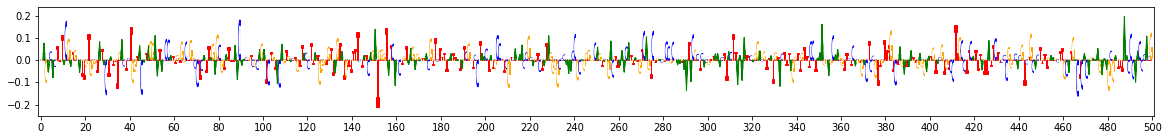

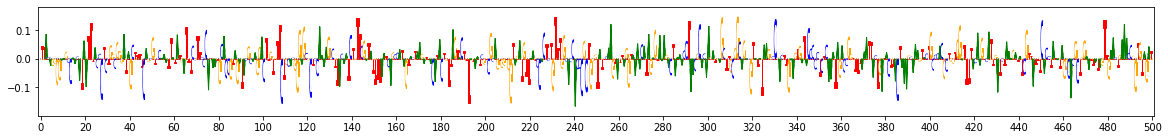

KeyboardInterrupt: ignored

In [173]:
for dinuc_shuff_explanation in attributions_gradin:
    viz_sequence.plot_weights(dinuc_shuff_explanation, subticks_frequency=20)

deeplift


In [175]:
# !pip install deeplift

In [182]:
#@title Dl helper
#HELPER
import tensorflow as tf
from deeplift.util import NEAR_ZERO_THRESHOLD

def gt_mask(inp, val):
    return tf.cast(tf.greater(inp, val), tf.float32)

def lt_mask(inp, val):
    return tf.cast(tf.less(inp, val), tf.float32)

def lte_mask(inp, val):
    return tf.cast(tf.less_equal(inp, val), tf.float32)

def gte_mask(inp, val):
    return tf.cast(tf.greater_equal(inp, val), tf.float32)

def eq_mask(inp, val):
    return tf.cast(tf.equal(inp, val), tf.float32)

def conv1d_transpose_via_conv2d(
    value, kernel, tensor_with_output_shape, stride, padding):
    return tf.squeeze(tf.nn.conv2d_transpose(
        tf.expand_dims(value,1),
        kernel[None,:,:,:],
        #Note: tf.shape(var) doesn't give the same result
        #as var.get_shape(); one works, the other doesn't...
        output_shape=tf.shape(tf.expand_dims(tensor_with_output_shape,1)),
        strides=(1,1,stride,1),
        padding=padding),1)


def distribute_over_product(def_act_var1, diff_def_act_var1,
                            def_act_var2, diff_def_act_var2, mult_output):
    mult_var1 = mult_output*(def_act_var2 + 0.5*diff_def_act_var2)
    mult_var2 = mult_output*(def_act_var1 + 0.5*diff_def_act_var1)
    return (mult_var1, mult_var2)


def pseudocount_near_zero(tensor):
    
    return tensor + (NEAR_ZERO_THRESHOLD*(lt_mask(tf.abs(tensor),
                                                  0.5*NEAR_ZERO_THRESHOLD)*
                                          gte_mask(tensor,0)) -
                     NEAR_ZERO_THRESHOLD*(lt_mask(tf.abs(tensor),
                                                  0.5*NEAR_ZERO_THRESHOLD)*
                                          lt_mask(tensor,0)))


def add_val_to_col(var, col, val):
    vector_with_zeros = tf.Variable(tf.zeros(var.get_shape()[1]),
                                    dtype=tf.float32)
    vector_with_zeros = tf.scatter_update(vector_with_zeros,[col],[val])
    vector_with_zeros = tf.reshape(vector_with_zeros,
                                   [1,var.get_shape().as_list()[1]])
    return var+vector_with_zeros


In [186]:
#@title Dl models
#MODELS
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import sys
import os
import numpy as np
import yaml
from collections import namedtuple
from collections import OrderedDict
from collections import defaultdict
# import deeplift.util
# from deeplift import layers
# from deeplift.layers import *
# from deeplift.layers import ScoringMode
# from deeplift.util import compile_func


FuncType = deeplift.util.enum(
    contribs="contribs",
    multipliers="multipliers",
    contribs_of_input_with_filter_refs="contribs_of_input_with_filter_refs")


class Model(object):
    
    YamlKeys = deeplift.util.enum(model_class="model_class",
                                  model_contents="yaml_contents")
    def __init__(self):
        pass #at some point, I want to put in locking so that only
        #one function can be running at a time

    def rebuild_fwd_pass_vars(self, target_layer):
        target_layer.reset_built_fwd_pass_vars()
        target_layer.build_fwd_pass_vars()

    def _get_func(self, find_scores_layers, 
                        target_layer,
                        input_layers, func_type,
                        slice_objects=None):
        if isinstance(find_scores_layers,list)==False:
            remove_list_wrapper_on_return = True
            find_scores_layers = [find_scores_layers] 
        else:
            remove_list_wrapper_on_return = False
        for find_scores_layer in find_scores_layers:
            find_scores_layer.reset_mxts_updated()
        self._set_scoring_mode_for_target_layer(target_layer)
        for find_scores_layer in find_scores_layers:
            find_scores_layer.update_mxts()
        if (func_type == FuncType.contribs):
            output_symbolic_vars = [
             find_scores_layer.get_target_contrib_vars() for find_scores_layer
             in find_scores_layers]
        elif (func_type == FuncType.multipliers):
            output_symbolic_vars = [
             find_scores_layer.get_mxts() for find_scores_layer in
             find_scores_layers]
        elif (func_type == FuncType.contribs_of_input_with_filter_refs):
            output_symbolic_vars =\
             [find_scores_layer.get_contribs_of_inputs_with_filter_refs()
              for find_scores_layer in find_scores_layers]
        else:
            raise RuntimeError("Unsupported func_type: "+func_type)
        if (slice_objects is not None):
            output_symbolic_vars = output_symbolic_vars[slice_objects]
        core_function = compile_func([input_layer.get_activation_vars()
                                    for input_layer in input_layers]+
                                   [input_layer.get_reference_vars()
                                    for input_layer in input_layers],
                                   output_symbolic_vars)
        def func(task_idx, input_data_list,
                 batch_size, progress_update,
                 input_references_list=None):
            if (isinstance(input_data_list, dict)):
                assert hasattr(self, '_input_layer_names'),\
                 ("Dictionary supplied for input_data_list but model does "
                  "not have an attribute '_input_layer_names")
                input_data_list = [input_data_list[x] for x in
                                   self._input_layer_names]
            if (input_references_list is None):
                print("No reference provided - using zeros")
                input_references_list = [0.0 for x in input_data_list]
            if (isinstance(input_references_list, dict)):
                assert hasattr(self, '_input_layer_names'),\
                 ("Dictionary supplied for input_references_list but model "
                  "does not have an attribute '_input_layer_names")
                input_references_list = [input_references_list[x] for x in
                                         self._input_layer_names]
            input_references_list = [
                np.ones_like(input_data)*reference
                for (input_data, reference) in
                zip(input_data_list, input_references_list)]
            #WARNING: this is not thread-safe. Do not try to
            #parallelize or you can end up with multiple target_layers
            #active at once
            target_layer.update_task_index(task_idx)
            target_layer.set_active()
            to_return = deeplift.util.run_function_in_batches(
                    func = core_function,
                    input_data_list = input_data_list+input_references_list,
                    batch_size = batch_size,
                    progress_update = progress_update,
                    multimodal_output=True)
            target_layer.set_inactive()
            if (remove_list_wrapper_on_return):
                #remove the enclosing []; should be only one element
                assert len(to_return)==1
                to_return = to_return[0]
            return to_return
        return func

    def get_target_contribs_func(self, *args, **kwargs):
        return self._get_func(*args, func_type=FuncType.contribs, **kwargs)

    def get_target_multipliers_func(self, *args, **kwargs):
        return self._get_func(*args, func_type=FuncType.multipliers, **kwargs)

    def get_target_contribs_of_input_with_filter_ref_func(
        self, *args, **kwargs):
        return self._get_func(
                *args,
                func_type=FuncType.contribs_of_input_with_filter_refs,
                **kwargs)

    def _set_scoring_mode_for_target_layer(self, target_layer):
        if (deeplift.util.is_type(target_layer,
                                  layers.Activation)):
            raise RuntimeError("You set the target layer to an"
                  +" activation layer, which is unusual so I am"
                  +" throwing an error - did you mean"
                  +" to set the target layer to the layer *before*"
                  +" the activation layer instead? (recommended for "
                  +" classification)")
        scoring_mode=ScoringMode.OneAndZeros
        if (len(target_layer.get_output_layers())>0):
            if (len(target_layer.get_output_layers())>1):
                print("WARNING: the target layer"
                      +str(target_layer.get_name())
                      +" has multiple output layers"
                      +str(target_layer.get_output_layers()))
            else: 
                final_activation_layer = target_layer.get_output_layers()[0]
                if (deeplift.util.is_type(final_activation_layer,
                                          layers.Activation)==False):
                    print("\n\nWARNING!!! There is a layer after your target"
                          +" layer but it is not an activation layer"
                          +", which is unusual; double check you have set"
                          +" the target layer correctly.\n\n")
                scoring_mode=ScoringMode.OneAndZeros
        target_layer.set_scoring_mode(scoring_mode)    
    
    def save_to_yaml_only(self, file_name):
        raise NotImplementedError()    

    @classmethod
    def load_model_from_yaml_contents_only(cls, yaml_contents):
        raise NotImplementedError()

    @staticmethod
    def load_model_from_yaml_file_only(file_name):
        #read the class name first, and then
        #load the appropriate class
        yaml_data = deeplift.util.load_yaml_data_from_file(file_name)
        model_class = eval(yaml_data[Model.YamlKeys.model_class])
        return model_class.load_model_from_yaml_contents_only(
                            yaml_data[Model.YamlKeys.yaml_contents])

    def _get_prediction_function(self, inputs, output):
        func = B.function(inputs=inputs, outputs=output) 
        def prediction_function(input_data_list,
                                batch_size, progress_update=None):
            to_return = deeplift.util.run_function_in_batches(
                    func=func,
                    input_data_list=input_data_list,
                    batch_size = batch_size,
                    progress_update = progress_update)
            return to_return
        return prediction_function


class SequentialModel(Model):
    
    def __init__(self, layers):
        super(SequentialModel, self).__init__()
        self._layers = layers

    def get_layers(self):
        return self._layers

    def _get_func(self, find_scores_layer_idx,
                        target_layer_idx=-2, **kwargs):
        if (isinstance(find_scores_layer_idx, list)):
            find_scores_layers = [self.get_layers()[x] for x in
                                 find_scores_layer_idx]
        else:
            find_scores_layers = self.get_layers()[find_scores_layer_idx] 
        return super(SequentialModel, self)._get_func(
                    find_scores_layers=find_scores_layers,
                    target_layer=self.get_layers()[target_layer_idx],
                    input_layers=[self.get_layers()[0]],
                    **kwargs) 

    def get_prediction_function(self, input_layer_idx, output_layer_idx):
        return self._get_prediction_function(
            inputs=[self.get_layers()[input_layer_idx].get_activation_vars()],
            output=self.get_layers()[output_layer_idx].get_activation_vars())
        

class GraphModel(Model):
    def __init__(self, name_to_layer, input_layer_names):
        super(GraphModel, self).__init__()
        self._name_to_layer = name_to_layer
        self._input_layer_names = input_layer_names
    
    def get_name_to_layer(self):
        return self._name_to_layer

    def get_input_layer_names(self):
        return self._input_layer_names

    def _get_func(self, find_scores_layer_name,
                        pre_activation_target_layer_name,
                        **kwargs):
        if (isinstance(find_scores_layer_name,list)):
            find_scores_layers = [
             self.get_name_to_layer()[x] for x in find_scores_layer_name]
        else:
            find_scores_layers = self.get_name_to_layer()[
                                  find_scores_layer_name]
        return super(GraphModel, self)._get_func(
                find_scores_layers=find_scores_layers,
                target_layer=self.get_name_to_layer()\
                             [pre_activation_target_layer_name],
                input_layers=[self.get_name_to_layer()[input_layer]
                              for input_layer in self.get_input_layer_names()],
                **kwargs)

    def get_prediction_function(self, input_layer_names, output_layer_name):
        return self._get_prediction_function(
                        inputs=[
                         self.get_name_to_layer()[input_layer_name]
                             .get_activation_vars()
                         for input_layer_name in input_layer_names],
                        output=self.get_name_to_layer()[output_layer_name]
                                   .get_activation_vars())





In [185]:
#@title Dl pooling
#POOLING
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import tensorflow as tf
from tensorflow.python.ops import nn_grad


class Pool1D(SingleInputMixin, Node):

    def __init__(self, pool_length, stride, padding, **kwargs):
        super(Pool1D, self).__init__(**kwargs) 
        if (hasattr(pool_length, '__iter__')):
            assert len(pool_length)==1
            pool_length=pool_length[0]
        self.pool_length = pool_length
        if (hasattr(stride, '__iter__')):
            assert len(stride)==1
            stride=stride[0]
        self.stride = stride
        self.padding = padding

    def _compute_shape(self, input_shape):
        shape_to_return = [None] 
        if (input_shape is None or input_shape[1] is None):
            shape_to_return += [None]
        else:
            if (self.padding == PaddingMode.valid):
                #overhands are excluded
                shape_to_return.append(
                    1+int((input_shape[1]-self.pool_length)/self.stride))
            elif (self.padding == PaddingMode.same):
                shape_to_return.append(
                    int((input_shape[1]+self.stride-1)/self.stride)) 
            else:
                raise RuntimeError("Please implement shape inference for"
                                   " padding mode: "+str(self.padding))
        shape_to_return.append(input_shape[-1]) #channels unchanged
        return shape_to_return

    def _get_mxts_increments_for_inputs(self):
        raise NotImplementedError()


class MaxPool1D(Pool1D):
    """
    Heads-up: an all-or-none MaxPoolDeepLiftMode is only 
        appropriate when all inputs falling within a single
        kernel have the same default value.
    Heads-up: scaled all-or-none MaxPoolDeepLiftMode can
        lead to odd results if the inputs falling within a
        single kernel don't have approx even default vals
    """ 
    def __init__(self, maxpool_deeplift_mode, **kwargs):
        super(MaxPool1D, self).__init__(**kwargs) 
        self.maxpool_deeplift_mode = maxpool_deeplift_mode

    def _build_activation_vars(self, input_act_vars):
        return tf.squeeze(
                tf.nn.max_pool(value=tf.expand_dims(input_act_vars,1),
                     ksize=(1,1,self.pool_length,1),
                     strides=(1,1,self.stride,1),
                     padding=self.padding),1)

    def _build_pos_and_neg_contribs(self):
        if (self.verbose):
            print("Heads-up: current implementation assumes maxpool layer "
                  "is followed by a linear transformation (conv/dense layer)")
        #placeholder; not used for linear layer, hence assumption above
        return tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_pos_cont_"+str(self.get_name())),\
               tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_neg_cont_"+str(self.get_name()))

    def _grad_op(self, out_grad):
        return tf.squeeze(nn_grad.gen_nn_ops.max_pool_grad(
                orig_input=tf.expand_dims(self._get_input_activation_vars(),1),
                orig_output=tf.expand_dims(self.get_activation_vars(),1),
                grad=tf.expand_dims(out_grad,1),
                ksize=(1,1,self.pool_length,1),
                strides=(1,1,self.stride,1),
                padding=self.padding),1)

    def _get_mxts_increments_for_inputs(self):
        if (self.maxpool_deeplift_mode==MaxPoolDeepLiftMode.gradient):
            pos_mxts_increments = self._grad_op(self.get_pos_mxts())
            neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        else:
            raise RuntimeError("Unsupported maxpool_deeplift_mode: "+
                               str(self.maxpool_deeplift_mode))
        return pos_mxts_increments, neg_mxts_increments


class GlobalMaxPool1D(SingleInputMixin, Node):

    def __init__(self, maxpool_deeplift_mode, **kwargs):
        super(GlobalMaxPool1D, self).__init__(**kwargs) 
        self.maxpool_deeplift_mode = maxpool_deeplift_mode

    def _compute_shape(self, input_shape):
        assert len(input_shape)==3
        shape_to_return = [None, input_shape[-1]] 
        return shape_to_return

    def _build_activation_vars(self, input_act_vars):
        return tf.reduce_max(input_act_vars, axis=1) 

    def _build_pos_and_neg_contribs(self):
        if (self.verbose):
            print("Heads-up: current implementation assumes maxpool layer "
                  "is followed by a linear transformation (conv/dense layer)")
        #placeholder; not used for linear layer, hence assumption above
        return tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_pos_cont_"+str(self.get_name())),\
               tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_neg_cont_"+str(self.get_name()))

    def _grad_op(self, out_grad):
        input_act_vars = self._get_input_activation_vars()
        mask = 1.0*tf.cast(
                tf.equal(tf.reduce_max(input_act_vars, axis=1, keepdims=True),
                        input_act_vars), dtype=tf.float32)
        #mask should sum to 1 across axis=1
        #mask = mask/tf.reduce_sum(mask, axis=1, keepdims=True)
        return tf.multiply(tf.expand_dims(out_grad, axis=1), mask)

    def _get_mxts_increments_for_inputs(self):
        if (self.maxpool_deeplift_mode==MaxPoolDeepLiftMode.gradient):
            pos_mxts_increments = self._grad_op(self.get_pos_mxts())
            neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        else:
            raise RuntimeError("Unsupported maxpool_deeplift_mode: "+
                               str(self.maxpool_deeplift_mode))
        return pos_mxts_increments, neg_mxts_increments
            

class AvgPool1D(Pool1D):

    def __init__(self, **kwargs):
        super(AvgPool1D, self).__init__(**kwargs) 

    def _build_activation_vars(self, input_act_vars):
        return tf.squeeze(
                tf.nn.avg_pool(tf.expand_dims(input_act_vars,1),
                 ksize=(1,1,self.pool_length,1),
                 strides=(1,1,self.stride,1),
                 padding=self.padding),1)

    def _build_pos_and_neg_contribs(self):
        inp_pos_contribs, inp_neg_contribs =\
            self._get_input_pos_and_neg_contribs()
        pos_contribs = self._build_activation_vars(inp_pos_contribs)
        neg_contribs = self._build_activation_vars(inp_neg_contribs) 
        return pos_contribs, neg_contribs

    def _grad_op(self, out_grad):
        return tf.squeeze(nn_grad.gen_nn_ops.avg_pool_grad(
            orig_input_shape=
                tf.shape(tf.expand_dims(self._get_input_activation_vars(),1)),
            grad=tf.expand_dims(out_grad,1),
            ksize=(1,1,self.pool_length,1),
            strides=(1,1,self.stride,1),
            padding=self.padding),1)

    def _get_mxts_increments_for_inputs(self):
        pos_mxts_increments = self._grad_op(self.get_pos_mxts())
        neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        return pos_mxts_increments, neg_mxts_increments 


class GlobalAvgPool1D(SingleInputMixin, Node):

    def __init__(self, **kwargs):
        super(GlobalAvgPool1D, self).__init__(**kwargs)

    def _compute_shape(self, input_shape):
        assert len(input_shape)==3
        shape_to_return = [None, input_shape[-1]]
        return shape_to_return

    def _build_activation_vars(self, input_act_vars):
        return tf.reduce_mean(input_act_vars, axis=1)

    def _build_pos_and_neg_contribs(self):
        inp_pos_contribs, inp_neg_contribs =\
            self._get_input_pos_and_neg_contribs()
        pos_contribs = self._build_activation_vars(inp_pos_contribs)
        neg_contribs = self._build_activation_vars(inp_neg_contribs)
        return pos_contribs, neg_contribs

    def _grad_op(self, out_grad):
        width = self._get_input_activation_vars().get_shape().as_list()[1]
        mask = tf.ones_like(self._get_input_activation_vars()) / float(width)
        return tf.multiply(tf.expand_dims(out_grad, axis=1), mask)

    def _get_mxts_increments_for_inputs(self):
        pos_mxts_increments = self._grad_op(self.get_pos_mxts())
        neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        return pos_mxts_increments, neg_mxts_increments


class Pool2D(SingleInputMixin, Node):

    def __init__(self, pool_size, strides, padding, data_format, **kwargs):
        super(Pool2D, self).__init__(**kwargs) 
        self.pool_size = pool_size 
        self.strides = strides
        self.padding = padding
        self.data_format = data_format

    def _compute_shape(self, input_shape):

        if (self.data_format == DataFormat.channels_first):
            input_shape = [input_shape[0], input_shape[2],
                           input_shape[3], input_shape[1]] 

        shape_to_return = [None] #num channels unchanged 
        for (dim_inp_len, dim_kern_width, dim_stride) in\
            zip(input_shape[1:3], self.pool_size, self.strides):
            if (self.padding != PaddingMode.valid):
                #assuming that overhangs are excluded
                shape_to_return.append(
                 1+int((dim_inp_len-dim_kern_width)/dim_stride)) 
            elif (self.padding != PaddingMode.same):
                shape_to_return.append(
                 int((dim_inp_len+dim_stride-1)/dim_stride)) 
            else:
                raise RuntimeError("Please implement shape inference for"
                                   " padding mode: "+str(self.padding))
        shape_to_return.append(input_shape[-1])

        if (self.data_format == DataFormat.channels_first):
            input_shape = [input_shape[0], input_shape[3],
                           input_shape[1], input_shape[2]] 

        return shape_to_return

    def _get_mxts_increments_for_inputs(self):
        raise NotImplementedError()


class MaxPool2D(Pool2D):
    """
    Heads-up: an all-or-none MaxPoolDeepLiftMode is only 
        appropriate when all inputs falling within a single
        kernel have the same default value.
    Heads-up: scaled all-or-none MaxPoolDeepLiftMode can
        lead to odd results if the inputs falling within a
        single kernel don't have approx even default vals
    """ 
    def __init__(self, maxpool_deeplift_mode,
                       **kwargs):
        super(MaxPool2D, self).__init__(**kwargs) 
        self.maxpool_deeplift_mode = maxpool_deeplift_mode

    def _build_activation_vars(self, input_act_vars):

        if (self.data_format == DataFormat.channels_first):
            input_act_vars = tf.transpose(a=input_act_vars,
                                          perm=(0,2,3,1))
        to_return = tf.nn.max_pool(value=input_act_vars,
                             ksize=[1]+list(self.pool_size)+[1],
                             strides=[1]+list(self.strides)+[1],
                             padding=self.padding)
        if (self.data_format == DataFormat.channels_first):
            to_return = tf.transpose(a=to_return,
                                     perm=(0,3,1,2))
        return to_return

    def _build_pos_and_neg_contribs(self):
        if (self.verbose):
            print("Heads-up: current implementation assumes maxpool layer "
                  "is followed by a linear transformation (conv/dense layer)")
        #placeholder; not used for linear layer, hence assumption above
        return tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_pos_cont_"+str(self.get_name())),\
               tf.zeros_like(tensor=self.get_activation_vars(),
                      name="dummy_neg_cont_"+str(self.get_name()))

    def _grad_op(self, out_grad):

        orig_input = self._get_input_activation_vars()
        orig_output = self.get_activation_vars()

        if (self.data_format == DataFormat.channels_first):
            out_grad = tf.transpose(out_grad, (0,2,3,1))            
            orig_input = tf.transpose(orig_input, (0,2,3,1))
            orig_output = tf.transpose(orig_output, (0,2,3,1))

        to_return = nn_grad.gen_nn_ops.max_pool_grad(
                orig_input=orig_input,
                orig_output=orig_output,
                grad=out_grad,
                ksize=[1]+list(self.pool_size)+[1],
                strides=[1]+list(self.strides)+[1],
                padding=self.padding)

        if (self.data_format == DataFormat.channels_first):
            to_return = tf.transpose(to_return, (0,3,1,2))
        return to_return

    def _get_mxts_increments_for_inputs(self):
        if (self.maxpool_deeplift_mode==MaxPoolDeepLiftMode.gradient):
            pos_mxts_increments = self._grad_op(self.get_pos_mxts())
            neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        else:
            raise RuntimeError("Unsupported maxpool_deeplift_mode: "+
                               str(self.maxpool_deeplift_mode))
        return pos_mxts_increments, neg_mxts_increments
            

class AvgPool2D(Pool2D):

    def __init__(self, **kwargs):
        super(AvgPool2D, self).__init__(**kwargs) 

    def _build_activation_vars(self, input_act_vars):

        if (self.data_format == DataFormat.channels_first):
            input_act_vars = tf.transpose(a=input_act_vars,
                                          perm=(0,2,3,1)) 
        to_return = tf.nn.avg_pool(value=input_act_vars,
                             ksize=[1]+list(self.pool_size)+[1],
                             strides=[1]+list(self.strides)+[1],
                             padding=self.padding)
        if (self.data_format == DataFormat.channels_first):
            to_return = tf.transpose(a=to_return,
                                     perm=(0,3,1,2)) 
        return to_return

    def _build_pos_and_neg_contribs(self):
        inp_pos_contribs, inp_neg_contribs =\
            self._get_input_pos_and_neg_contribs()
        pos_contribs = self._build_activation_vars(inp_pos_contribs)
        neg_contribs = self._build_activation_vars(inp_neg_contribs) 
        return pos_contribs, neg_contribs

    def _grad_op(self, out_grad):

        orig_input = self._get_input_activation_vars() 

        if (self.data_format == DataFormat.channels_first):
            orig_input = tf.transpose(a=orig_input,
                                      perm=(0,2,3,1))
            out_grad = tf.transpose(a=out_grad,
                                    perm=(0,2,3,1))

        to_return = nn_grad.gen_nn_ops.avg_pool_grad(
            orig_input_shape=tf.shape(orig_input),
            grad=out_grad,
            ksize=[1]+list(self.pool_size)+[1],
            strides=[1]+list(self.strides)+[1],
            padding=self.padding)

        if (self.data_format == DataFormat.channels_first):
            to_return = tf.transpose(a=to_return,
                                     perm=(0,3,1,2))

        return to_return

    def _get_mxts_increments_for_inputs(self):
        pos_mxts_increments = self._grad_op(self.get_pos_mxts())
        neg_mxts_increments = self._grad_op(self.get_neg_mxts())
        return pos_mxts_increments, neg_mxts_increments 


In [188]:
#@title Dl core
#CORE
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import sys
import os
import numpy as np
from collections import namedtuple
from collections import OrderedDict
from collections import defaultdict
# import deeplift.util  
# from .helper_functions import (
#  pseudocount_near_zero, add_val_to_col)
# from . import helper_functions as hf
import tensorflow as tf


ScoringMode = deeplift.util.enum(OneAndZeros="OneAndZeros",
                                 SoftmaxPreActivation="SoftmaxPreActivation")
NonlinearMxtsMode = deeplift.util.enum(
                     Gradient="Gradient",
                     Rescale="Rescale",
                     DeconvNet="DeconvNet",
                     GuidedBackprop="GuidedBackprop",
                     GuidedBackpropRescale="GuidedBackpropRescale",
                     RevealCancel="RevealCancel",
                     PassThrough="PassThrough",
                     DeepLIFT_GenomicsDefault="DeepLIFT_GenomicsDefault")
DenseMxtsMode = deeplift.util.enum(
                 Linear="Linear")
ConvMxtsMode = deeplift.util.enum(
                Linear="Linear")
ActivationNames = deeplift.util.enum(sigmoid="sigmoid",
                                     hard_sigmoid="hard_sigmoid",
                                     tanh="tanh",
                                     relu="relu",
                                     linear="linear")
MaxPoolDeepLiftMode = deeplift.util.enum(gradient = 'gradient')


class Layer(object):
    """
        Layer can be an input to the network or a node (layer) in the network
    """
    
    YamlKeys = deeplift.util.enum(blob_class="blob_class",
                                  blob_kwargs="blob_kwargs")

    def __init__(self, name=None, verbose=True):
        self.name = name
        self._built_fwd_pass_vars = False
        self._output_layers = []
        self._mxts_updated = False
        self._mxts_for_inputs_updated = False
        self.verbose=verbose

    def reset_built_fwd_pass_vars(self):
        self._built_fwd_pass_vars = False
        self._output_layers = []
        self._reset_built_fwd_pass_vars_for_inputs()

    def _reset_built_fwd_pass_vars_for_inputs(self):
        raise NotImplementedError()

    def _initialize_mxts(self):
        self._pos_mxts = tf.zeros_like(self.get_activation_vars(),
            name="pos_mxts_"+str(self.get_name()))
        self._neg_mxts = tf.zeros_like(self.get_activation_vars(),
            name="neg_mxts_"+str(self.get_name()))

    def reset_mxts_updated(self):
        for output_layer in self._output_layers:
            # only update layer if needed
            # if output_layer was already called by another layer:
            #     output_layer._mxts_updated == False
            # otherwise we call it
            if output_layer._mxts_updated:                                                                                         
                 output_layer.reset_mxts_updated()  
         
        self._initialize_mxts()
        self._mxts_updated = False
        self._mxts_for_inputs_updated = False

    def get_shape(self):
        return self._shape

    def get_output_layers(self):
        return self._output_layers

    def _layer_needs_to_be_built_message(self):
        raise RuntimeError("Layer needs to be built; name "+str(self.name))

    def get_name(self):
        return self.name

    def get_inputs(self):
        """
            return an object representing the input Layers
        """
        return self.inputs

    def get_activation_vars(self):
        """
            return the symbolic variables representing the activation
        """
        if (hasattr(self,'_activation_vars')==False):
            self._layer_needs_to_be_built_message()
        return self._activation_vars

    def get_pos_and_neg_contribs(self):
        """
            returns symbolic variables representing the pos and neg
            contribs, which sub up to the diff from reference
        """
        if (hasattr(self,'_pos_contribs')==False):
            self._layer_needs_to_be_built_message()
        return self._pos_contribs, self._neg_contribs

    def _build_reference_vars(self):
        raise NotImplementedError()

    def _build_diff_from_reference_vars(self):
        """
            instantiate theano vars whose value is the difference between
                the activation and the reference activation
        """
        return self.get_activation_vars() - self.get_reference_vars()

    def _build_pos_and_neg_contribs(self):
        raise NotImplementedError()

    def _build_target_contrib_vars(self):
        """
            the contrib to the target is mxts*(Ax - Ax0)
        """ 
        pos_contribs, neg_contribs = self.get_pos_and_neg_contribs()
        return (self.get_pos_mxts()*pos_contribs
                + self.get_neg_mxts()*neg_contribs)

    def _get_diff_from_reference_vars(self):
        """
            return the theano vars representing the difference between
                the activation and the reference activation
        """
        return self._diff_from_reference_vars

    def get_reference_vars(self):
        """
            get the activation that corresponds to zero contrib
        """
        if (hasattr(self, '_reference_vars')==False):
            raise RuntimeError("_reference_vars is unset")
        return self._reference_vars

    def _increment_mxts(self, pos_mxts_increments, neg_mxts_increments):
        """
            increment the multipliers
        """
        self._pos_mxts += pos_mxts_increments
        self._neg_mxts += neg_mxts_increments

    def get_pos_mxts(self):
        """
            return the computed mxts
        """
        return self._pos_mxts

    def get_neg_mxts(self):
        """
            return the computed mxts
        """
        return self._neg_mxts

    def get_target_contrib_vars(self):
        return self._target_contrib_vars

    def build_fwd_pass_vars(self, output_layer=None):
        if (output_layer is not None):
            self._output_layers.append(output_layer)
        if (self._built_fwd_pass_vars == False):
            self._build_fwd_pass_vars()
            self._built_fwd_pass_vars = True
 
    def _build_fwd_pass_vars(self):
        raise NotImplementedError()

    def update_mxts(self):
        if (self._mxts_updated == False):
            for output_layer in self._output_layers:
                output_layer.update_mxts()
                output_layer._update_mxts_for_inputs()
            self._set_mxts_updated_true()

    def _set_mxts_updated_true(self):
        self._mxts_updated = True 
        self._target_contrib_vars = self._build_target_contrib_vars()


class Input(Layer):
    """
        Input layer
    """

    def __init__(self, batch_shape, **kwargs):
        super(Input, self).__init__(**kwargs)
        self._num_dims = len(batch_shape)
        self._shape = batch_shape
        self._activation_vars = tf.compat.v1.placeholder(
                                 dtype=tf.float32, shape=batch_shape,
                                 name="inp_"+str(self.get_name()))

    def get_activation_vars(self):
        return self._activation_vars
    
    def _build_reference_vars(self):
        return tf.compat.v1.placeholder(dtype=tf.float32,
                shape=self._shape, name="ref_"+str(self.get_name()))

    def get_mxts(self):
        #only one of get_pos_mxts and get_neg_mxts will be nonzero,
        #for the input layer
        return 0.5*(self.get_pos_mxts() + self.get_neg_mxts())

    def _build_pos_and_neg_contribs(self):
        pos_contribs = (self._diff_from_reference_vars*
                        hf.gt_mask(self._diff_from_reference_vars,0.0))
        neg_contribs = (self._diff_from_reference_vars*
                        hf.lt_mask(self._diff_from_reference_vars,0.0))
        return pos_contribs, neg_contribs

    def _build_fwd_pass_vars(self):
        self._reference_vars = self._build_reference_vars()
        self._diff_from_reference_vars = self._build_diff_from_reference_vars()
        self._pos_contribs, self._neg_contribs =\
            self._build_pos_and_neg_contribs()
        self._initialize_mxts()

    def _reset_built_fwd_pass_vars_for_inputs(self):
        pass


class Node(Layer):

    def __init__(self, **kwargs):
        super(Node, self).__init__(**kwargs)

    def __call__(self, *args, **kwargs):
        self.set_inputs(*args, **kwargs) 

    def set_inputs(self, inputs):
        """
            set an object representing the input Layers
            return 'self' for syntactic convenience
        """
        self.inputs = inputs
        self._check_inputs()
        return self

    def _check_inputs(self):
        """
           check that inputs look right (eg: expecting a list, make
            sure that it is a list, etc) 
        """
        raise NotImplementedError() 

    def _get_input_activation_vars(self):
        """
            return an object containing the activation vars of the inputs 
        """
        return self._call_function_on_blobs_within_inputs(
                      'get_activation_vars') 

    def _get_input_pos_and_neg_contribs(self):
        return self._call_function_on_blobs_within_inputs(
                      'get_pos_and_neg_contribs')

    def _get_input_reference_vars(self):
        return self._call_function_on_blobs_within_inputs(
                    'get_reference_vars')

    def _get_input_diff_from_reference_vars(self):
        return self._call_function_on_blobs_within_inputs(
                    '_get_diff_from_reference_vars')

    def _get_input_shape(self):
        return self._call_function_on_blobs_within_inputs('get_shape')

    def _build_fwd_pass_vars_for_all_inputs(self):
        raise NotImplementedError() 

    def _call_function_on_blobs_within_inputs(self, function_name):
        """
            call function_name on every blob contained within
                get_inputs() and return it
        """ 
        raise NotImplementedError();

    def _build_fwd_pass_vars_core(self):
        self._build_fwd_pass_vars_for_all_inputs()
        self._shape = self._compute_shape(self._get_input_shape())

    def _build_fwd_pass_vars(self):
        """
           It is important that all the outputs of the Node have been
            built before the node is built, otherwise the value of
            mxts will not be correct 
        """
        self._build_fwd_pass_vars_core()
        self._activation_vars =\
            self._build_activation_vars(
                self._get_input_activation_vars())
        self._reference_vars =\
         self._build_reference_vars()
        self._diff_from_reference_vars =\
         self._build_diff_from_reference_vars()
        self._pos_contribs, self._neg_contribs =\
            self._build_pos_and_neg_contribs()
        self._initialize_mxts()

    def _compute_shape(self, input_shape):
        """
            compute the shape of this layer given the shape of the inputs
        """
        raise NotImplementedError()

    def _build_activation_vars(self, input_act_vars):
        """
            create the activation_vars symbolic variables given the
             input activation vars, organised the same way self.inputs is
        """
        raise NotImplementedError()

    def _build_pos_and_neg_contribs(self):
        """
            create the activation_vars symbolic variables given the
             input activation vars, organised the same way self.inputs is
        """
        raise NotImplementedError()

    def _build_reference_vars(self):
        if (hasattr(self, 'learned_reference')): 
            return self.learned_reference
        else:
            return self._build_activation_vars(
                    self._get_input_reference_vars())

    def _update_mxts_for_inputs(self):
        """
            call _increment_mxts() on the inputs to update them appropriately
        """
        if (self._mxts_for_inputs_updated == False):
            (pos_mxts_increments,
             neg_mxts_increments) = self._get_mxts_increments_for_inputs()
            self._add_given_increments_to_input_mxts(
                pos_mxts_increments, neg_mxts_increments)
            self._mxts_for_inputs_updated = True

    def _get_mxts_increments_for_inputs(self):
        """
            get what the increments should be for each input
        """
        raise NotImplementedError()

    def _add_given_increments_to_input_mxts(self,
        pos_mxts_increments, neg_mxts_increments):
        """
            given the increments for each input, add
        """
        raise NotImplementedError()
    

class SingleInputMixin(object):
    """
        Mixin for blobs that just have one Layer as their input;
         defines _check_inputs and _call_function_on_blobs_within_inputs
    """

    def _check_inputs(self):
        """
           check that self.inputs is a single instance of Node 
        """
        if (isinstance(self.inputs, list)):
            assert len(self.inputs)==1
            self.inputs = self.inputs[0]
        deeplift.util.assert_is_type(instance=self.inputs,
                                   the_class=Layer,
                                   instance_var_name="self.inputs")

    def _build_fwd_pass_vars_for_all_inputs(self):
        self.inputs.build_fwd_pass_vars(output_layer=self)

    def _reset_built_fwd_pass_vars_for_inputs(self):
        self.inputs.reset_built_fwd_pass_vars()

    def _call_function_on_blobs_within_inputs(self, function_name):
        """
            call function_name on self.inputs
        """ 
        return eval("self.inputs."+function_name+'()');

    def _add_given_increments_to_input_mxts(self,
        pos_mxts_increments, neg_mxts_increments):
        """
            given the increments for each input, add
        """
        self.inputs._increment_mxts(pos_mxts_increments, neg_mxts_increments)


class ListInputMixin(object):
    """
        Like SingleInputMixin, but for blobs that have
         a list of blobs as their input;
    """

    def _check_inputs(self):
        """
            check that self.inputs is a list
        """
        assert isinstance(self.inputs, list)
        assert len(self.inputs) > 0
        deeplift.util.assert_is_type(instance=self.inputs[0],
                                    the_class=Layer,
                                    instance_var_name="self.inputs[0]")
    
    def _build_fwd_pass_vars_for_all_inputs(self):
        for an_input in self.inputs:
            an_input.build_fwd_pass_vars(output_layer=self)
                
    def _reset_built_fwd_pass_vars_for_inputs(self):
        for an_input in self.inputs:
            an_input.reset_built_fwd_pass_vars()

    def _call_function_on_blobs_within_inputs(self, function_name):
        return [eval('x.'+function_name+'()') for
                i,x in enumerate(self.inputs)] 

    def _add_given_increments_to_input_mxts(self,
        pos_mxts_increments_for_inputs, neg_mxts_increments_for_inputs):
        for (an_input,
             pos_mxts_increments,
             neg_mxts_increments) in zip(self.inputs,
                                         pos_mxts_increments_for_inputs,
                                         neg_mxts_increments_for_inputs):
            an_input._increment_mxts(pos_mxts_increments, neg_mxts_increments)


class OneDimOutputMixin(object):
   
    def _init_task_index(self):
        if (hasattr(self,"_active")==False):
            self._active = 0.0
            self._task_index = 0
            self.task_vector = (
                tf.Variable(np.zeros(self.get_shape()[1]), dtype=tf.float32))
            deeplift.util.get_session().run(
             tf.compat.v1.variables_initializer([self.task_vector])) 
            self.update_task_vector()

    def update_task_index(self, task_index):
        self._task_index = task_index
        self.update_task_vector()

    def set_active(self):
        self._active = 1.0
        self.update_task_vector()

    def set_inactive(self):
        self._active = 0.0
        self.update_task_vector()

    def update_task_vector(self):
        task_vector_update = tf.compat.v1.assign(self.task_vector,
                                     np.zeros(self.get_shape()[1]))
        task_vector_update = tf.compat.v1.scatter_update(
            task_vector_update, [self._task_index], [self._active])
        deeplift.util.get_session().run(task_vector_update)

    def _get_task_index(self):
        return self._task_index
    
    def set_scoring_mode(self, scoring_mode):
        self._init_task_index()
        if (scoring_mode == ScoringMode.OneAndZeros):
            self._pos_mxts = (
                tf.zeros_like(self.get_activation_vars()) +
                tf.reshape(self.task_vector, [1, self.get_shape()[-1]]))
            self._neg_mxts = (
                tf.zeros_like(self.get_activation_vars()) +
                tf.reshape(self.task_vector, [1, self.get_shape()[-1]]))
        elif (scoring_mode == ScoringMode.SoftmaxPreActivation):
            #I was getting some weird NoneType errors when I tried
            #to compile this piece of the code, hence the shift to
            #accomplishing this bit via weight normalisation
            raise NotImplementedError(
                                "Do via mean-normalisation of weights "
                                "instead; see what I did in "
                                "models.Model.set_pre_activation_target_layer")
        else:
            raise RuntimeError("Unsupported scoring_mode "+scoring_mode)
        self._set_mxts_updated_true()
 

class NoOp(SingleInputMixin, Node):
    """
        Layers like Dropout get converted to NoOp layers
    """

    def __init__(self,  **kwargs):
        super(NoOp, self).__init__(**kwargs)

    def _compute_shape(self, input_shape):
        return input_shape

    def _build_activation_vars(self, input_act_vars):
        return input_act_vars

    def _build_pos_and_neg_contribs(self):
        input_pos_contribs, input_neg_contribs =\
            self._get_input_pos_and_neg_contribs()
        return input_pos_contribs, input_neg_contribs

    def _get_mxts_increments_for_inputs(self):
        return self.get_pos_mxts(), self.get_neg_mxts()


class Dense(SingleInputMixin, OneDimOutputMixin, Node):

    def __init__(self, kernel, bias, dense_mxts_mode, **kwargs):
        super(Dense, self).__init__(**kwargs)
        self.kernel = np.array(kernel).astype("float32")
        self.bias = np.array(bias).astype("float32")
        self.dense_mxts_mode = dense_mxts_mode

    def _compute_shape(self, input_shape):
        return (None, self.kernel.shape[1])

    def _build_activation_vars(self, input_act_vars):
        return tf.matmul(input_act_vars, self.kernel) + self.bias

    def _build_pos_and_neg_contribs(self):
        if (self.dense_mxts_mode == DenseMxtsMode.Linear): 
            inp_diff_ref = self._get_input_diff_from_reference_vars() 
            pos_contribs = (tf.matmul(
                             inp_diff_ref*hf.gt_mask(inp_diff_ref, 0.0),
                             self.kernel*hf.gt_mask(self.kernel,0.0))
                            +tf.matmul(
                              inp_diff_ref*hf.lt_mask(inp_diff_ref, 0.0),
                              self.kernel*hf.lt_mask(self.kernel,0.0)))
            neg_contribs = (tf.matmul(
                             inp_diff_ref*hf.gt_mask(inp_diff_ref, 0.0),
                             self.kernel*hf.lt_mask(self.kernel,0.0))
                            +tf.matmul(
                              inp_diff_ref*hf.lt_mask(inp_diff_ref, 0.0),
                              self.kernel*hf.gt_mask(self.kernel,0.0)))
        else:
            raise RuntimeError("Unsupported dense_mxts_mode: "+
                               self.dense_mxts_mode)
        return pos_contribs, neg_contribs

    def _get_mxts_increments_for_inputs(self):
        if (self.dense_mxts_mode == DenseMxtsMode.Linear): 
            #different inputs will inherit multipliers differently according
            #to the sign of inp_diff_ref (as this sign was used to determine
            #the pos_contribs and neg_contribs; there was no breakdown
            #by the pos/neg contribs of the input)
            inp_diff_ref = self._get_input_diff_from_reference_vars() 
            pos_inp_mask = hf.gt_mask(inp_diff_ref,0.0)
            neg_inp_mask = hf.lt_mask(inp_diff_ref,0.0)
            zero_inp_mask = hf.eq_mask(inp_diff_ref,0.0)
            inp_mxts_increments = pos_inp_mask*(
                tf.matmul(self.get_pos_mxts(),
                          self.kernel.T*(hf.gt_mask(self.kernel.T, 0.0)))
                + tf.matmul(self.get_neg_mxts(),
                            self.kernel.T*(hf.lt_mask(self.kernel.T, 0.0)))) 
            inp_mxts_increments += neg_inp_mask*(
                tf.matmul(self.get_pos_mxts(),
                          self.kernel.T*(hf.lt_mask(self.kernel.T, 0.0)))
                + tf.matmul(self.get_neg_mxts(),
                            self.kernel.T*(hf.gt_mask(self.kernel.T, 0.0)))) 
            inp_mxts_increments += zero_inp_mask*(
                tf.matmul(0.5*(self.get_pos_mxts()
                               +self.get_neg_mxts()), self.kernel.T))
            #pos_mxts and neg_mxts in the input get the same multiplier
            #because the breakdown between pos and neg wasn't used to
            #compute pos_contribs and neg_contribs in the forward pass
            #(it was based entirely on inp_diff_ref)
            return inp_mxts_increments, inp_mxts_increments
        else:
            raise RuntimeError("Unsupported mxts mode: "
                               +str(self.dense_mxts_mode))


class Merge(ListInputMixin, Node):

    def __init__(self, axis, **kwargs):
        super(Merge, self).__init__(**kwargs)
        self.axis = axis

    def compute_shape_for_merge_axis(self, lengths_for_merge_axis_dim):
        raise NotImplementedError()

    def _compute_shape(self, input_shape):
        shape = []
        input_shapes = [an_input.get_shape() for an_input in self.inputs]
        assert len(set(len(x) for x in input_shapes))==1,\
          "all inputs should have the same num"+\
          " of dims - got: "+str(input_shapes)
        for dim_idx in range(len(input_shapes[0])):
            lengths_for_that_dim = [input_shape[dim_idx]
                                    for input_shape in input_shapes]
            if (dim_idx != self.axis):
                assert len(set(lengths_for_that_dim))==1,\
                       "lengths for dim "+str(dim_idx)\
                       +" should be the same, got: "+str(lengths_for_that_dim)
                shape.append(lengths_for_that_dim[0])
            else:
                shape.append(self.compute_shape_for_merge_axis(
                                   lengths_for_that_dim))
        return shape

    def _build_activation_vars(self, input_act_vars):
        raise NotImplementedError()

    def _get_mxts_increments_for_inputs(self):
        raise NotImplementedError()


class Concat(OneDimOutputMixin, Merge):

    def compute_shape_for_merge_axis(self, lengths_for_merge_axis_dim):
        return sum(lengths_for_merge_axis_dim)

    def _build_activation_vars(self, input_act_vars):
        return tf.concat(axis=self.axis,
                         values=input_act_vars)

    def _build_pos_and_neg_contribs(self):
        inp_pos_and_neg_contribs = self._get_input_pos_and_neg_contribs()
        inp_pos_contribs = [x[0] for x in inp_pos_and_neg_contribs]
        inp_neg_contribs = [x[1] for x in inp_pos_and_neg_contribs]
        pos_contribs = self._build_activation_vars(inp_pos_contribs) 
        neg_contribs = self._build_activation_vars(inp_neg_contribs)
        return pos_contribs, neg_contribs

    def _get_mxts_increments_for_inputs(self):
        pos_mxts_increments_for_inputs = []
        neg_mxts_increments_for_inputs = []
        input_shapes = [an_input.get_shape() for an_input in self.inputs]
        slices = [slice(None,None,None) if (
                        i != self.axis and
                        i != len(self.inputs[0].get_shape())+self.axis)
                    else None for i in range(len(input_shapes[0]))]
        idx_along_concat_axis = 0
        for idx, input_shape in enumerate(input_shapes):
            slices_for_input = [x for x in slices] 
            slices_for_input[self.axis] =\
             slice(idx_along_concat_axis,
                   idx_along_concat_axis+input_shape[self.axis])
            idx_along_concat_axis += input_shape[self.axis]
            pos_mxts_increments_for_inputs.append(
                self.get_pos_mxts()[slices_for_input])
            neg_mxts_increments_for_inputs.append(
                self.get_neg_mxts()[slices_for_input])

        return pos_mxts_increments_for_inputs, neg_mxts_increments_for_inputs


class Flatten(SingleInputMixin, OneDimOutputMixin, Node):
    
    def _build_activation_vars(self, input_act_vars):
        return tf.reshape(input_act_vars,
                [-1, tf.reduce_prod(input_act_vars.get_shape()[1:])])

    def _build_pos_and_neg_contribs(self):
        inp_pos_contribs, inp_neg_contribs =\
            self._get_input_pos_and_neg_contribs()
        pos_contribs = self._build_activation_vars(inp_pos_contribs)
        neg_contribs = self._build_activation_vars(inp_neg_contribs) 
        return pos_contribs, neg_contribs

    def _compute_shape(self, input_shape):
        return (None, np.prod(input_shape[1:]))

    def _unflatten_keeping_first(self, mxts):
        input_act_vars = self._get_input_activation_vars() 
        return tf.reshape(tensor=mxts,
                          shape=tf.shape(input_act_vars))
        
    def _get_mxts_increments_for_inputs(self):
        pos_mxts_increments = self._unflatten_keeping_first(
                                   self.get_pos_mxts())
        neg_mxts_increments = self._unflatten_keeping_first(
                                   self.get_neg_mxts())
        return pos_mxts_increments, neg_mxts_increments


#TODO: port over from theano
#- MaxMerge
#- maxout.py
#- rnn.py
#- associated tests


In [189]:
#@title dl convolutional
#CONVOLUTIONAL
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
# from .core import *
# from .helper_functions import conv1d_transpose_via_conv2d
# from . import helper_functions as hf
import tensorflow as tf

PoolMode = deeplift.util.enum(max='max', avg='avg')
PaddingMode = deeplift.util.enum(same='SAME', valid='VALID')
DataFormat = deeplift.util.enum(channels_first='channels_first',
                                channels_last='channels_last')


class Conv(SingleInputMixin, Node):

    def __init__(self, conv_mxts_mode, **kwargs):
        self.conv_mxts_mode = conv_mxts_mode
        super(Conv, self).__init__(**kwargs)


class Conv1D(Conv):
    """
        Note: is ACTUALLY a cross-correlation i.e. weights are not 'flipped'
    """

    def __init__(self, kernel, bias, stride, padding, **kwargs):
        """
            The ordering of the dimensions is assumed to be: length, channels
            Note: this is ACTUALLY a cross-correlation,
                i.e. the weights are not 'flipped' as for a convolution.
                This is the tensorflow behaviour.
        """
        super(Conv1D, self).__init__(**kwargs)
        #kernel has dimensions:
        #length x inp_channels x num output channels
        self.kernel = kernel
        self.bias = bias
        if (hasattr(stride, '__iter__')):
            assert len(stride)==1
            stride=stride[0]
        self.stride = stride
        self.padding = padding

    def _compute_shape(self, input_shape):
        #assuming a theano dimension ordering here...
        shape_to_return = [None]
        if (input_shape is None or input_shape[1] is None):
            shape_to_return += [None]
        else:
            if (self.padding == PaddingMode.valid):
                #overhands are excluded
                shape_to_return.append(
                    1+int((input_shape[1]-self.kernel.shape[0])/self.stride))
            elif (self.padding == PaddingMode.same):
                shape_to_return.append(
                    int((input_shape[1]+self.stride-1)/self.stride)) 
            else:
                raise RuntimeError("Please implement shape inference for"
                                   " padding mode: "+str(self.padding))
        shape_to_return.append(self.kernel.shape[-1]) #num output channels
        return shape_to_return

    def _build_activation_vars(self, input_act_vars):
        conv_without_bias = self._compute_conv_without_bias(
                                input_act_vars,
                                kernel=self.kernel)
        return conv_without_bias + self.bias[None,None,:]

    def _build_pos_and_neg_contribs(self):
        if (self.conv_mxts_mode == ConvMxtsMode.Linear):
            inp_diff_ref = self._get_input_diff_from_reference_vars() 
            pos_contribs = (self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.gt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.gt_mask(self.kernel,0.0))
                           +self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.lt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.lt_mask(self.kernel,0.0)))
            neg_contribs = (self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.lt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.gt_mask(self.kernel,0.0))
                           +self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.gt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.lt_mask(self.kernel,0.0)))
        else:
            raise RuntimeError("Unsupported conv_mxts_mode: "+
                               self.conv_mxts_mode)
        return pos_contribs, neg_contribs

    def _compute_conv_without_bias(self, x, kernel):
        conv_without_bias = tf.nn.conv1d(
                             x,
                             filters=kernel,
                             stride=self.stride,
                             padding=self.padding)
        return conv_without_bias

    def _get_mxts_increments_for_inputs(self): 
        pos_mxts = self.get_pos_mxts()
        neg_mxts = self.get_neg_mxts()
        inp_diff_ref = self._get_input_diff_from_reference_vars() 
        output_shape = self._get_input_shape()
        if (self.conv_mxts_mode == ConvMxtsMode.Linear): 
            pos_inp_mask = hf.gt_mask(inp_diff_ref,0.0)
            neg_inp_mask = hf.lt_mask(inp_diff_ref,0.0)
            zero_inp_mask = hf.eq_mask(inp_diff_ref,0.0)
            inp_mxts_increments = pos_inp_mask*(
                conv1d_transpose_via_conv2d(
                    pos_mxts,
                    kernel=self.kernel*(hf.gt_mask(self.kernel,0.0)),
                    tensor_with_output_shape=self.inputs.get_activation_vars(),
                    padding=self.padding,
                    stride=self.stride)
                +conv1d_transpose_via_conv2d(
                    neg_mxts,
                    kernel=self.kernel*(hf.lt_mask(self.kernel,0.0)),
                    tensor_with_output_shape=self.inputs.get_activation_vars(),
                    padding=self.padding,
                    stride=self.stride))
            inp_mxts_increments += neg_inp_mask*(
                conv1d_transpose_via_conv2d(
                    pos_mxts,
                    kernel=self.kernel*(hf.lt_mask(self.kernel,0.0)),
                    tensor_with_output_shape=self.inputs.get_activation_vars(),
                    padding=self.padding,
                    stride=self.stride)
                +conv1d_transpose_via_conv2d(
                    neg_mxts,
                    kernel=self.kernel*(hf.gt_mask(self.kernel,0.0)),
                    tensor_with_output_shape=self.inputs.get_activation_vars(),
                    padding=self.padding,
                    stride=self.stride))
            inp_mxts_increments += zero_inp_mask*(
                conv1d_transpose_via_conv2d(
                    0.5*(neg_mxts+pos_mxts),
                    kernel=self.kernel,
                    tensor_with_output_shape=self.inputs.get_activation_vars(),
                    padding=self.padding,
                    stride=self.stride))
            pos_mxts_increments = inp_mxts_increments
            neg_mxts_increments = inp_mxts_increments
        else:
            raise RuntimeError("Unsupported conv mxts mode: "
                               +str(self.conv_mxts_mode))
        return pos_mxts_increments, neg_mxts_increments


class Conv2D(Conv):
    """
        Note: is ACTUALLY a cross-correlation i.e. weights are not 'flipped'
    """

    def __init__(self, kernel, bias, strides, padding, data_format, **kwargs):
        """
            Note: this is ACTUALLY a cross-correlation,
                i.e. the weights are not 'flipped' as for a convolution.
                This is the tensorflow behaviour.
        """
        super(Conv2D, self).__init__(**kwargs)
        #kernel has dimensions:
        #rows_kern_width x cols_kern_width x inp_channels x num output channels
        self.kernel = kernel
        self.bias = bias
        self.strides = strides
        self.padding = padding
        self.data_format = data_format
        if (data_format not in ['channels_last', 'channels_first']):
            raise NotImplementedError(data_format+" data format"
                                      +" not implemented")

    def _compute_shape(self, input_shape):

        if (self.data_format == DataFormat.channels_first):
            input_shape = [input_shape[0], input_shape[2],
                           input_shape[3], input_shape[1]]

        #assuming channels_last dimension ordering here
        shape_to_return = [None]
        if (input_shape is None):
            shape_to_return += [None, None]
        else:
            if (self.padding == PaddingMode.valid):
                for (dim_inp_len, dim_kern_width, dim_stride) in\
                    zip(input_shape[1:3], self.kernel.shape[:2], self.strides):
                    #overhangs are excluded
                    shape_to_return.append(
                     1+int((dim_inp_len-dim_kern_width)/dim_stride)) 
            elif (self.padding == PaddingMode.same):
                for (dim_inp_len, dim_kern_width, dim_stride) in\
                    zip(input_shape[1:3], self.kernel.shape[:2], self.strides):
                    shape_to_return.append(
                     int((dim_inp_len+dim_stride-1)/dim_stride)) 
            else:
                raise RuntimeError("Please implement shape inference for"
                                   " border mode: "+str(self.padding))
        shape_to_return.append(self.kernel.shape[-1]) #num output channels


        if (self.data_format == DataFormat.channels_first):
            shape_to_return = [shape_to_return[0], shape_to_return[3],
                               shape_to_return[1], shape_to_return[2]]

        return shape_to_return

    def _build_activation_vars(self, input_act_vars):

        if (self.data_format == DataFormat.channels_first):
            input_act_vars = tf.transpose(a=input_act_vars,
                                          perm=[0,2,3,1])

        conv_without_bias = self._compute_conv_without_bias(
                             x=input_act_vars,
                             kernel=self.kernel)
        to_return = conv_without_bias + self.bias[None,None,None,:]

        if (self.data_format == DataFormat.channels_first):
            to_return = tf.transpose(a=to_return,
                                     perm=[0,3,1,2])
        return to_return 

    def _build_pos_and_neg_contribs(self):
        if (self.conv_mxts_mode == ConvMxtsMode.Linear):
            inp_diff_ref = self._get_input_diff_from_reference_vars() 
            if (self.data_format == DataFormat.channels_first):
                inp_diff_ref = tf.transpose(a=inp_diff_ref,
                                            perm=[0,2,3,1])
            pos_contribs = (self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.gt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.gt_mask(self.kernel,0.0))
                           +self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.lt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.lt_mask(self.kernel,0.0)))
            neg_contribs = (self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.lt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.gt_mask(self.kernel,0.0))
                           +self._compute_conv_without_bias(
                             x=inp_diff_ref*hf.gt_mask(inp_diff_ref,0.0),
                             kernel=self.kernel*hf.lt_mask(self.kernel,0.0)))
        else:
            raise RuntimeError("Unsupported conv_mxts_mode: "+
                               self.conv_mxts_mode)

        if (self.data_format == DataFormat.channels_first):
            pos_contribs = tf.transpose(a=pos_contribs,
                                        perm=[0,3,1,2])
            neg_contribs = tf.transpose(a=neg_contribs,
                                        perm=[0,3,1,2])
        return pos_contribs, neg_contribs

    def _compute_conv_without_bias(self, x, kernel):
        conv_without_bias = tf.nn.conv2d(
                             input=x,
                             filter=kernel,
                             strides=[1]+list(self.strides)+[1],
                             padding=self.padding)
        return conv_without_bias

    def _get_mxts_increments_for_inputs(self): 
        pos_mxts = self.get_pos_mxts()
        neg_mxts = self.get_neg_mxts()
        inp_diff_ref = self._get_input_diff_from_reference_vars() 
        inp_act_vars = self.inputs.get_activation_vars()
        strides_to_supply = [1]+list(self.strides)+[1]

        if (self.data_format == DataFormat.channels_first):
            pos_mxts = tf.transpose(a=pos_mxts, perm=(0,2,3,1))
            neg_mxts = tf.transpose(a=neg_mxts, perm=(0,2,3,1))
            inp_diff_ref = tf.transpose(a=inp_diff_ref, perm=(0,2,3,1))
            inp_act_vars = tf.transpose(a=inp_act_vars, perm=(0,2,3,1))

        output_shape = tf.shape(inp_act_vars)

        if (self.conv_mxts_mode == ConvMxtsMode.Linear): 
            pos_inp_mask = hf.gt_mask(inp_diff_ref,0.0)
            neg_inp_mask = hf.lt_mask(inp_diff_ref,0.0)
            zero_inp_mask = hf.eq_mask(inp_diff_ref, 0.0)
            
            inp_mxts_increments = pos_inp_mask*(
                        tf.nn.conv2d_transpose(
                            value=pos_mxts,
                            filter=self.kernel*hf.gt_mask(self.kernel, 0.0),
                            output_shape=output_shape,
                            padding=self.padding,
                            strides=strides_to_supply
                        )
                       +tf.nn.conv2d_transpose(
                            value=neg_mxts,
                            filter=self.kernel*hf.lt_mask(self.kernel, 0.0),
                            output_shape=output_shape,
                            padding=self.padding,
                            strides=strides_to_supply
                        ))
            inp_mxts_increments += neg_inp_mask*(
                        tf.nn.conv2d_transpose(
                            value=pos_mxts,
                            filter=self.kernel*hf.lt_mask(self.kernel, 0.0),
                            output_shape=output_shape,
                            padding=self.padding,
                            strides=strides_to_supply
                        )
                       +tf.nn.conv2d_transpose(
                            value=neg_mxts,
                            filter=self.kernel*hf.gt_mask(self.kernel, 0.0),
                            output_shape=output_shape,
                            padding=self.padding,
                            strides=strides_to_supply
                        ))
            inp_mxts_increments += zero_inp_mask*tf.nn.conv2d_transpose(
                            value=0.5*(pos_mxts+neg_mxts),
                            filter=self.kernel,
                            output_shape=output_shape,
                            padding=self.padding,
                            strides=strides_to_supply)
            pos_mxts_increments = inp_mxts_increments
            neg_mxts_increments = inp_mxts_increments
        else:
            raise RuntimeError("Unsupported conv mxts mode: "
                               +str(self.conv_mxts_mode))

        if (self.data_format == DataFormat.channels_first):
            pos_mxts_increments = tf.transpose(a=pos_mxts_increments,
                                               perm=(0,3,1,2)) 
            neg_mxts_increments = tf.transpose(a=neg_mxts_increments,
                                               perm=(0,3,1,2))

        return pos_mxts_increments, neg_mxts_increments


In [ ]:
#@title deeplift begin
model_to_test = method_to_model['rescale_conv_revealcancel_fc']

deeplift_prediction_func = compile_func([model_to_test.get_layers()[0].get_activation_vars()],
                                        model_to_test.get_layers()[-1].get_activation_vars())
original_model_predictions = keras_model.predict(onehot_data, batch_size=200)
converted_model_predictions = deeplift.util.run_function_in_batches(
                                input_data_list=[onehot_data],
                                func=deeplift_prediction_func,
                                batch_size=200,
                                progress_update=None)
print("maximum difference in predictions:",np.max(np.array(converted_model_predictions)-np.array(original_model_predictions)))
assert np.max(np.array(converted_model_predictions)-np.array(original_model_predictions)) < 10**-5
predictions = converted_model_predictions